<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Loan_Default_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
# Storing the target variable separately
target = df['Status'].copy()
df.drop('Status', axis=1, inplace=True)

In [5]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,29.0


In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')

In [7]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [8]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,61.000000


In [9]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [10]:
df.duplicated().sum()

np.int64(0)

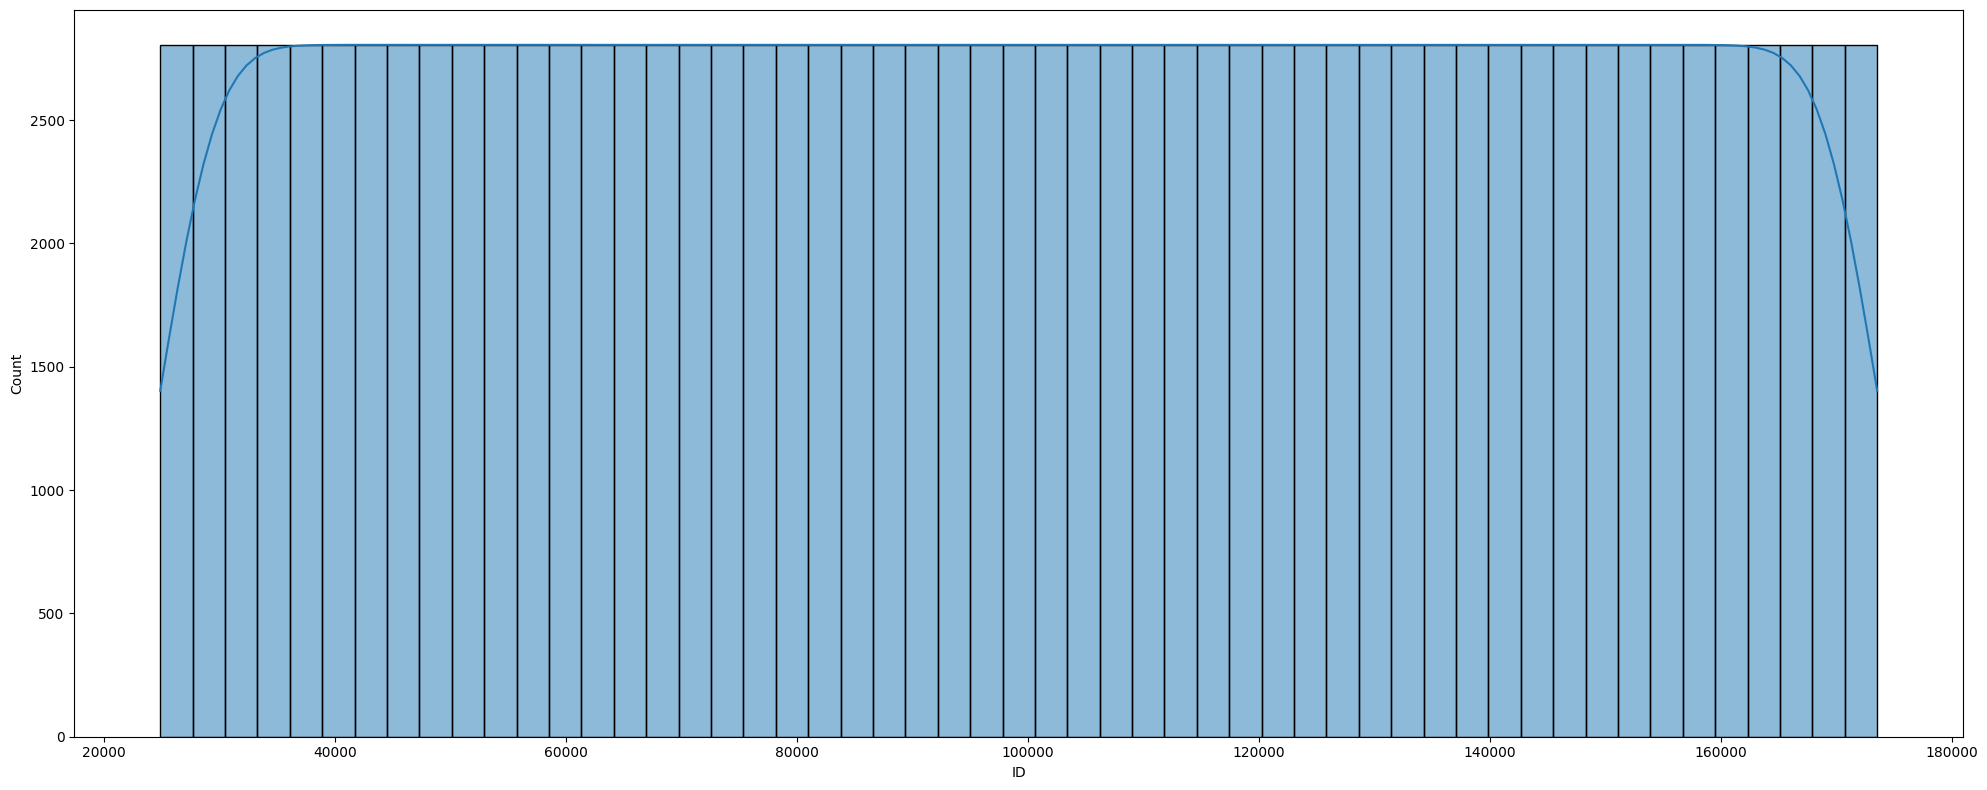

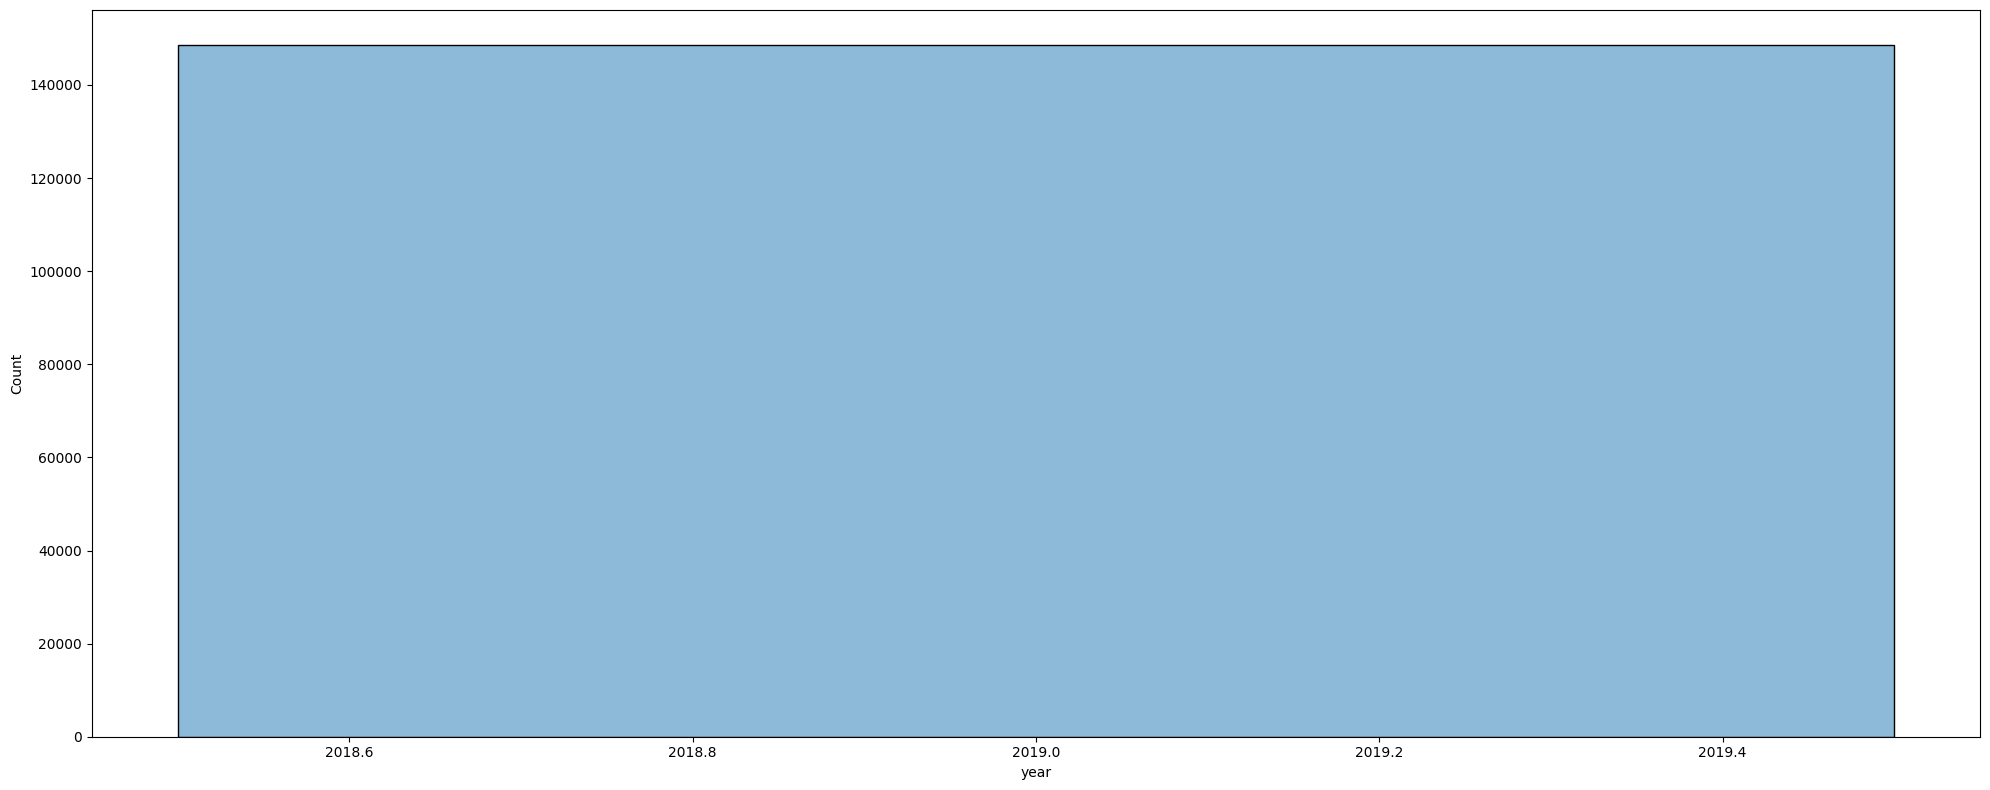

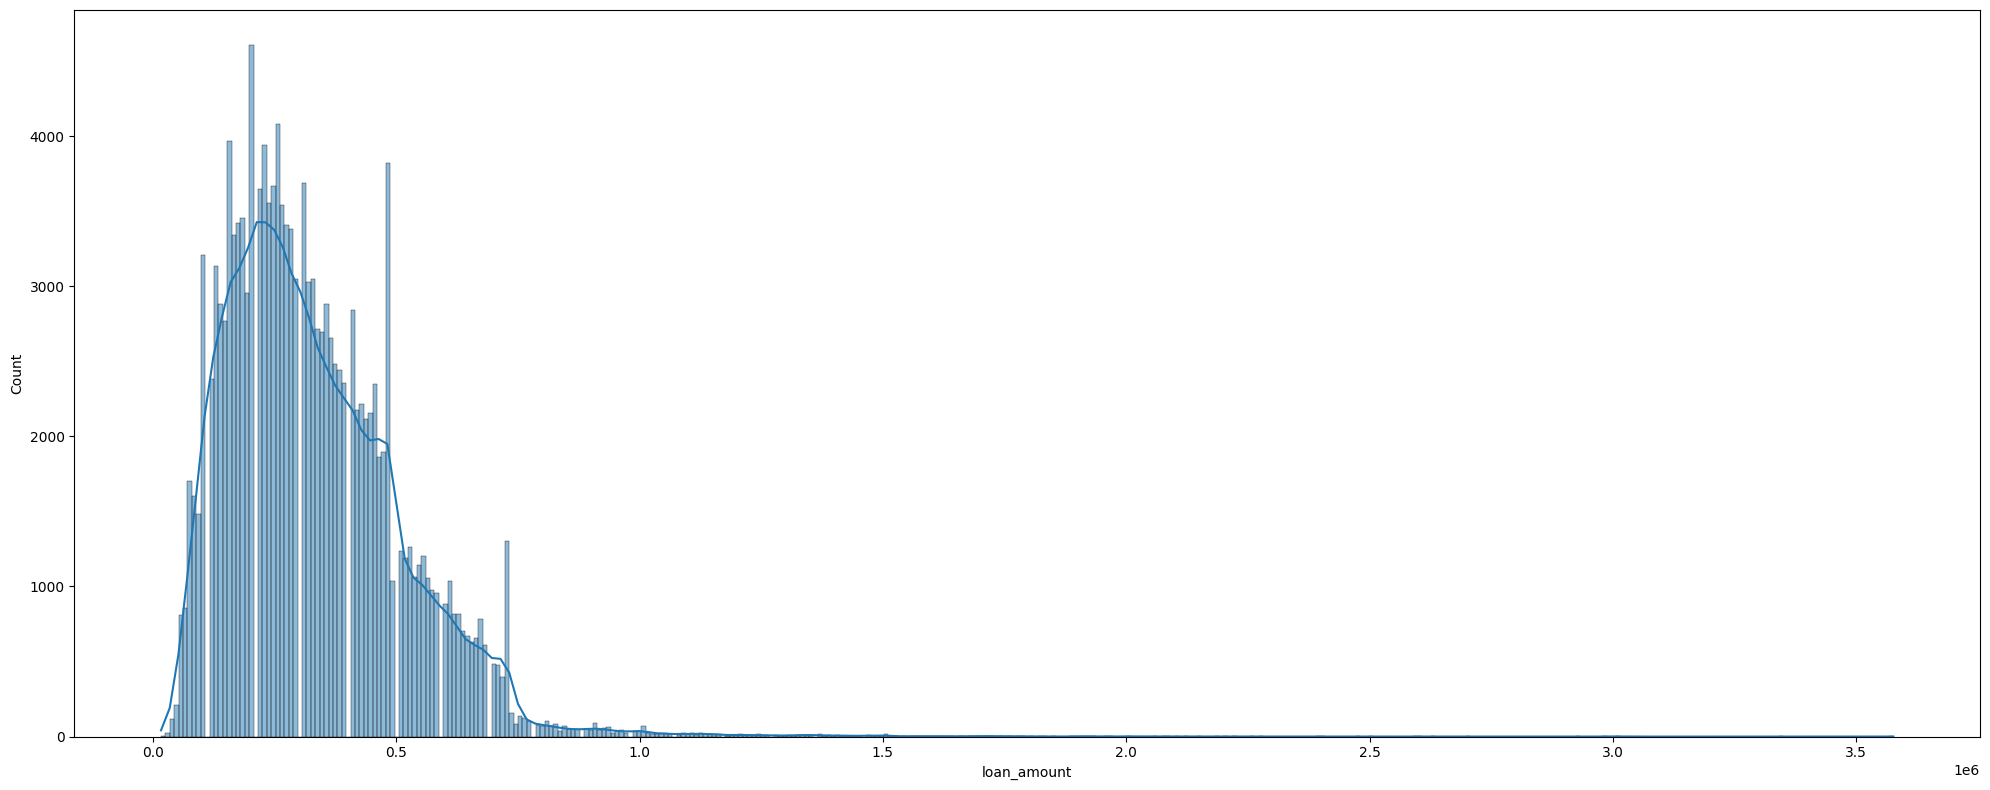

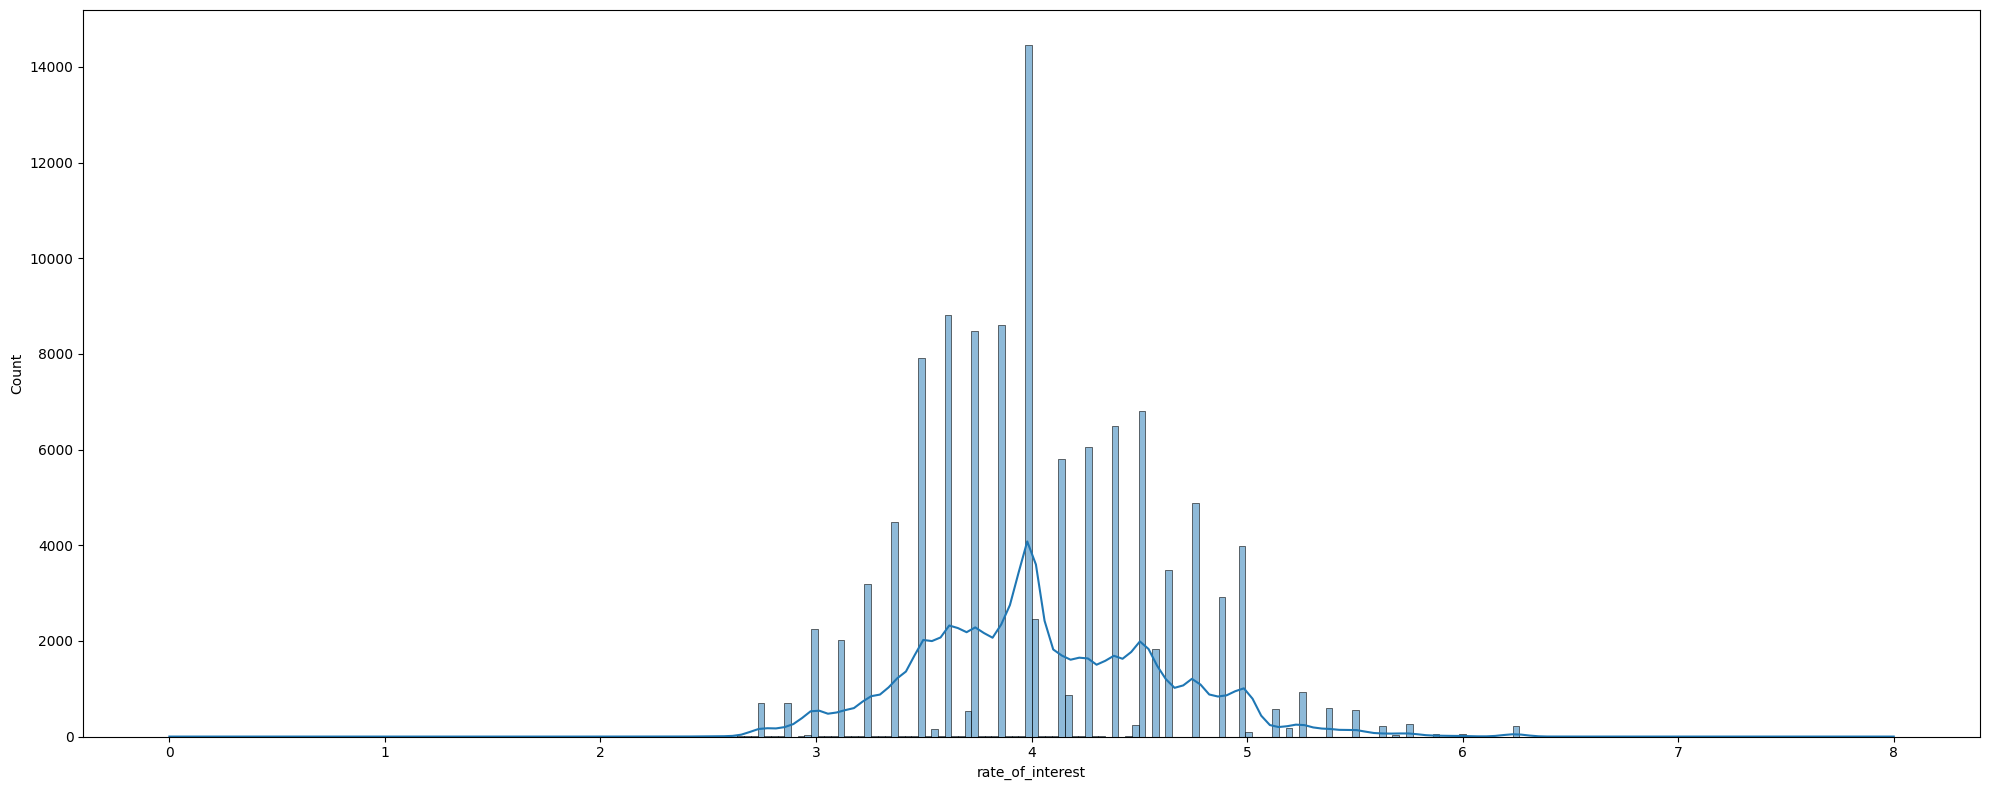

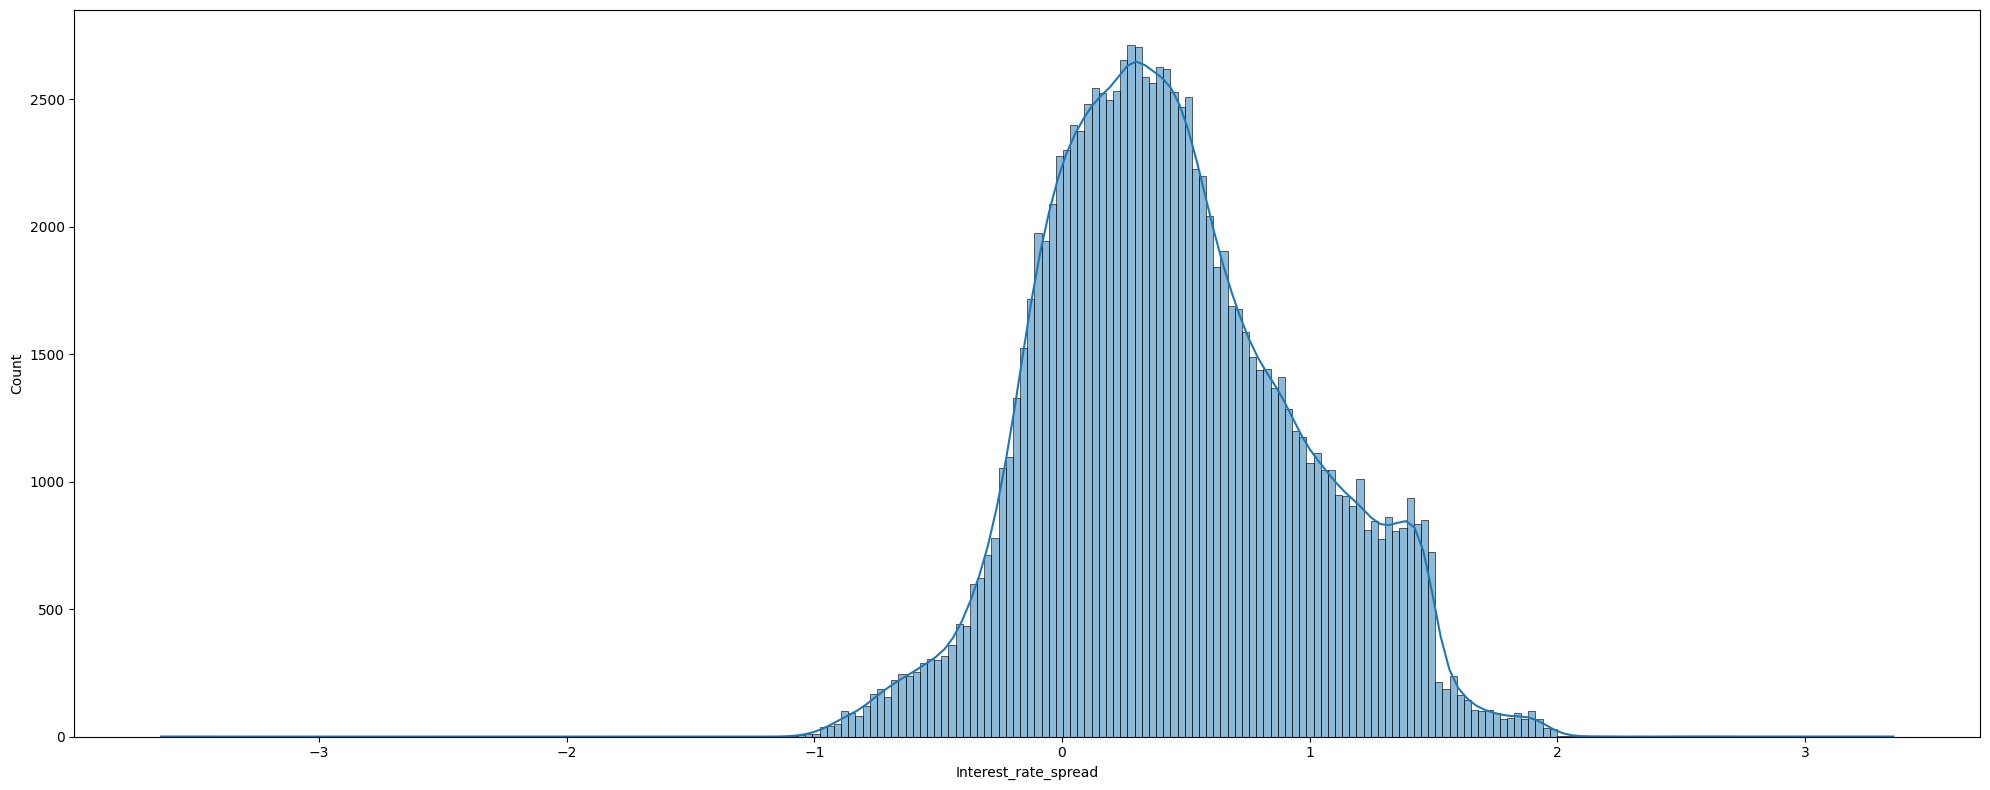

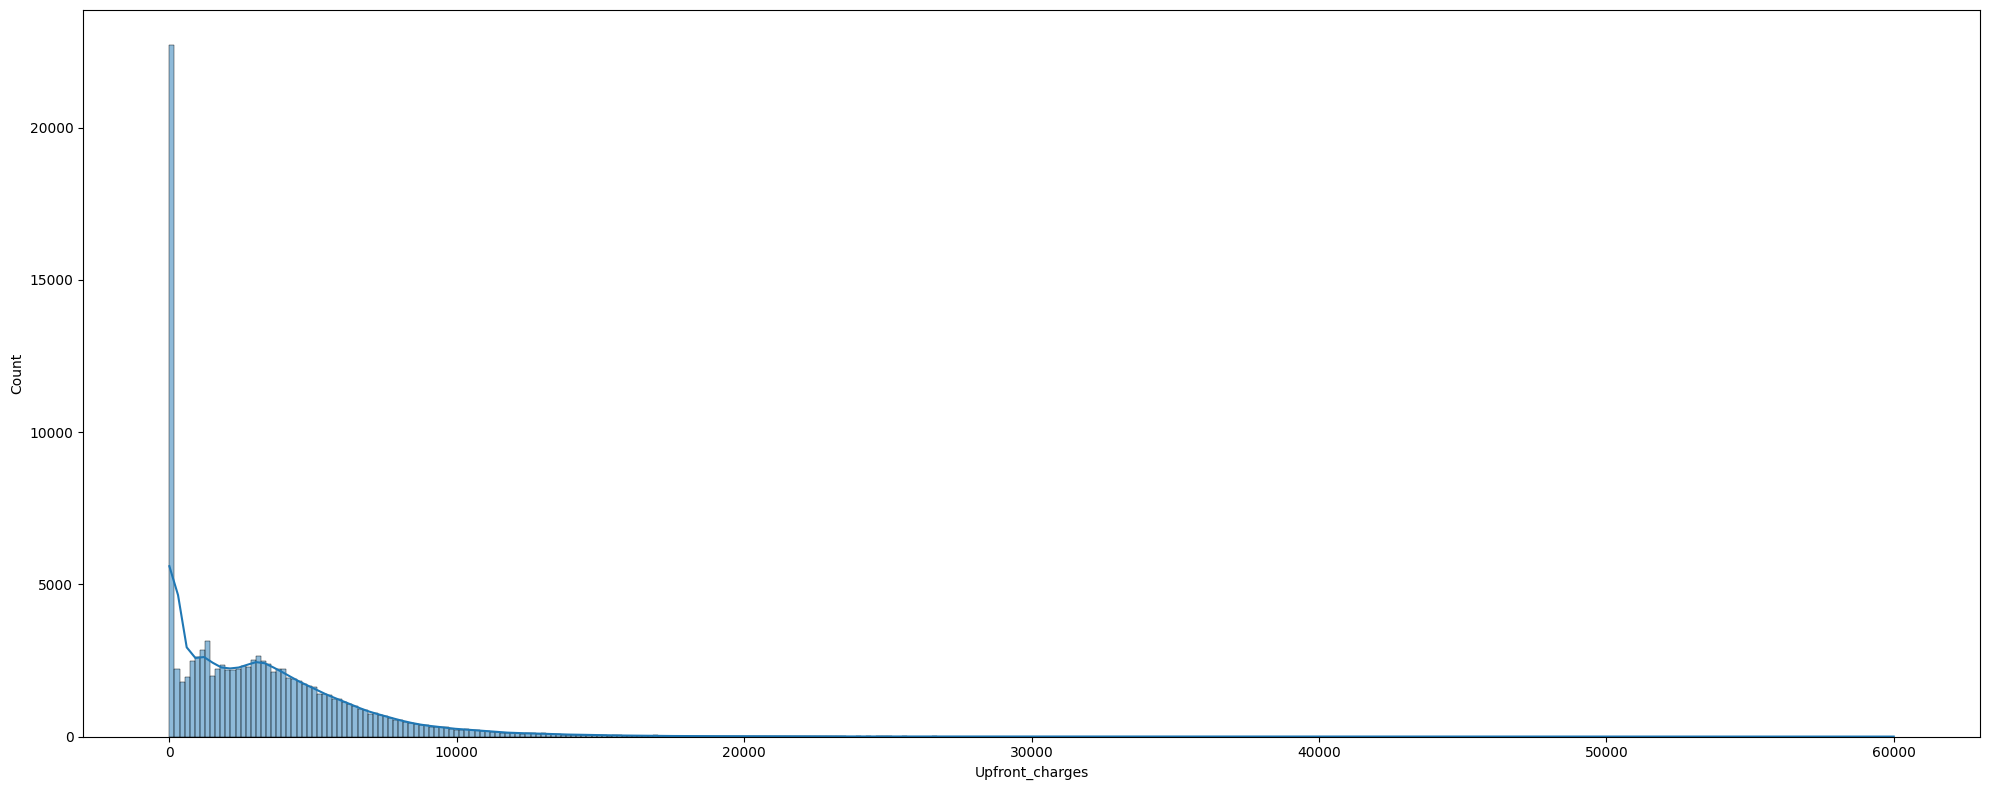

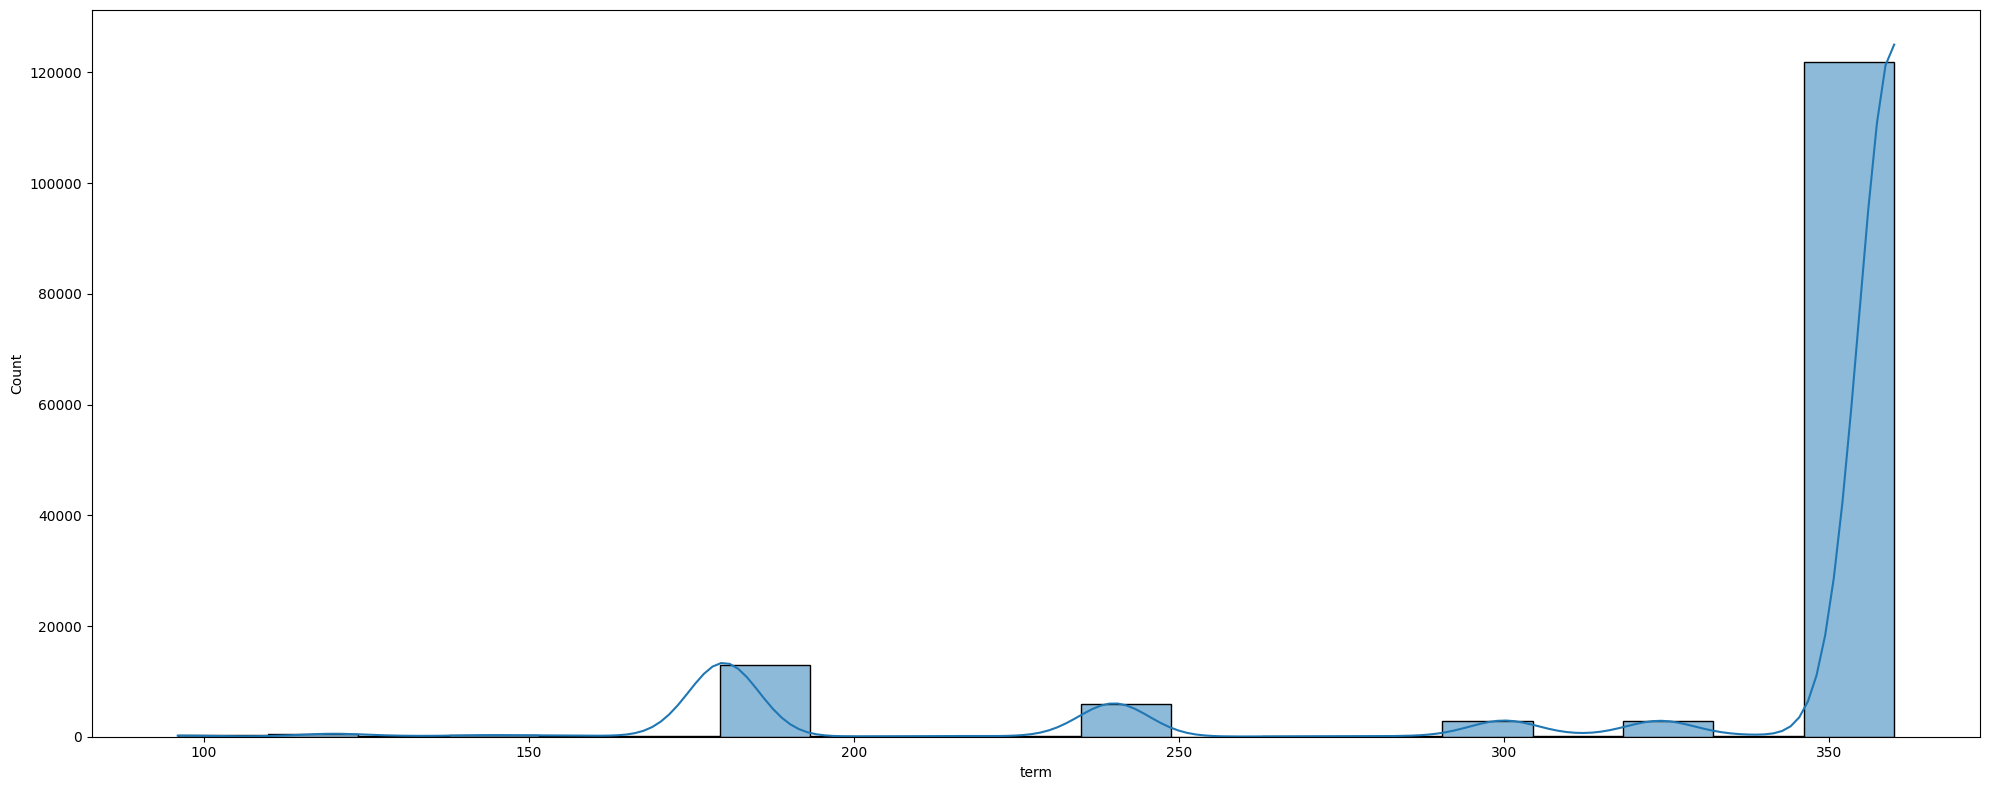

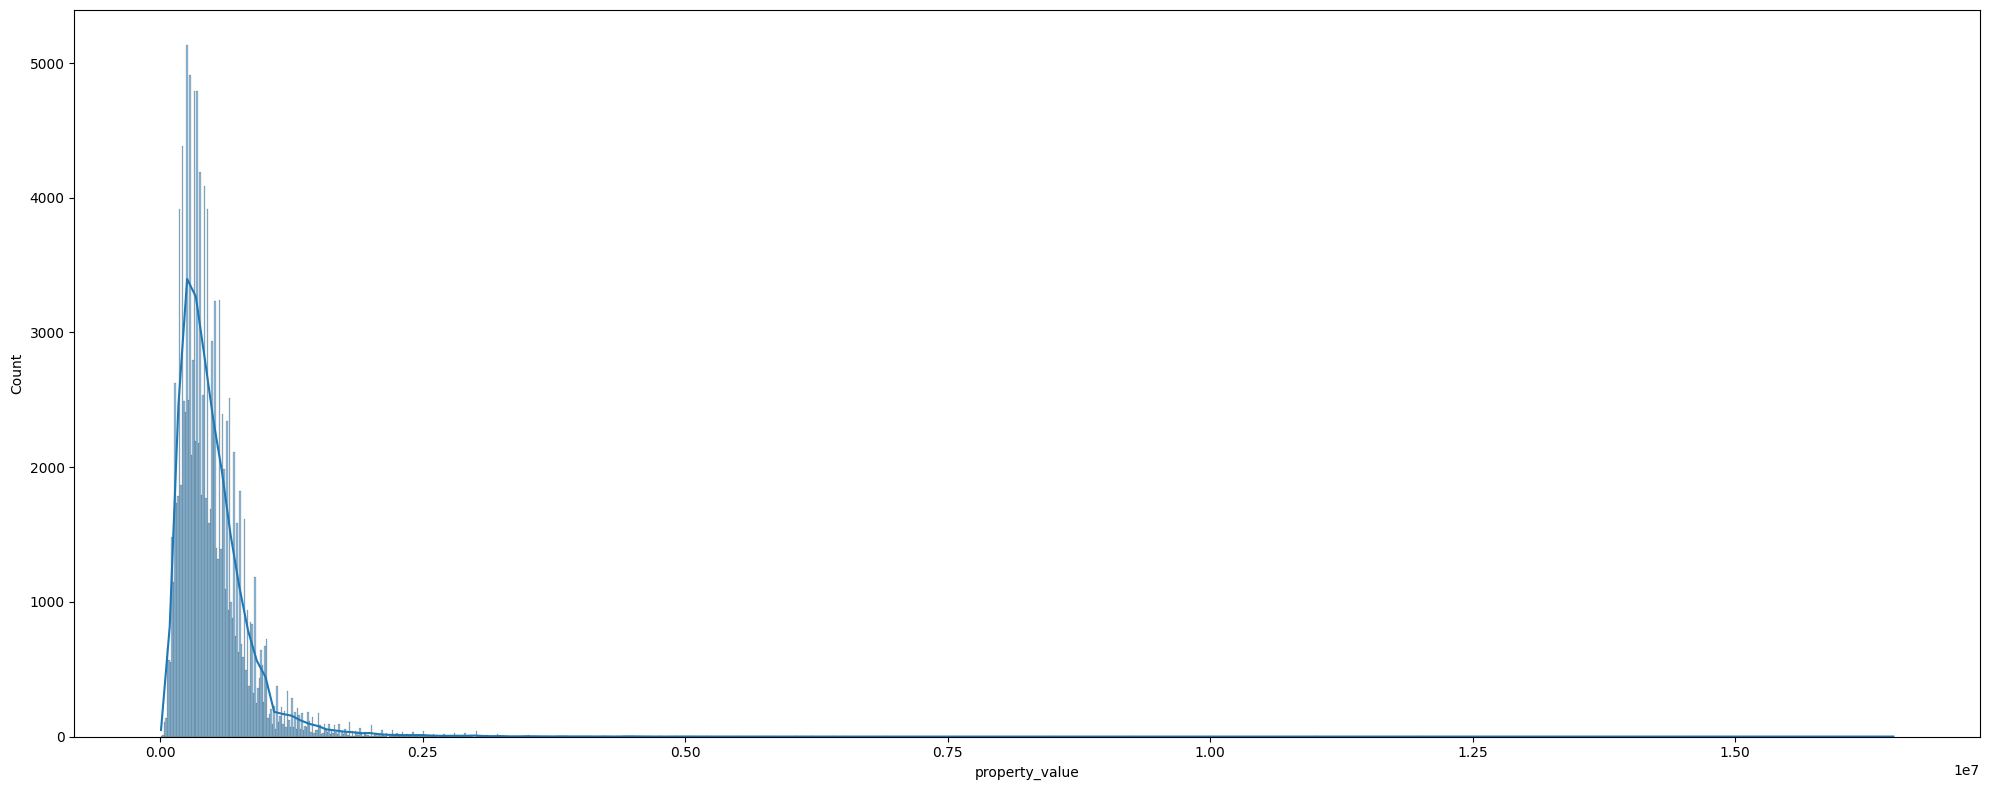

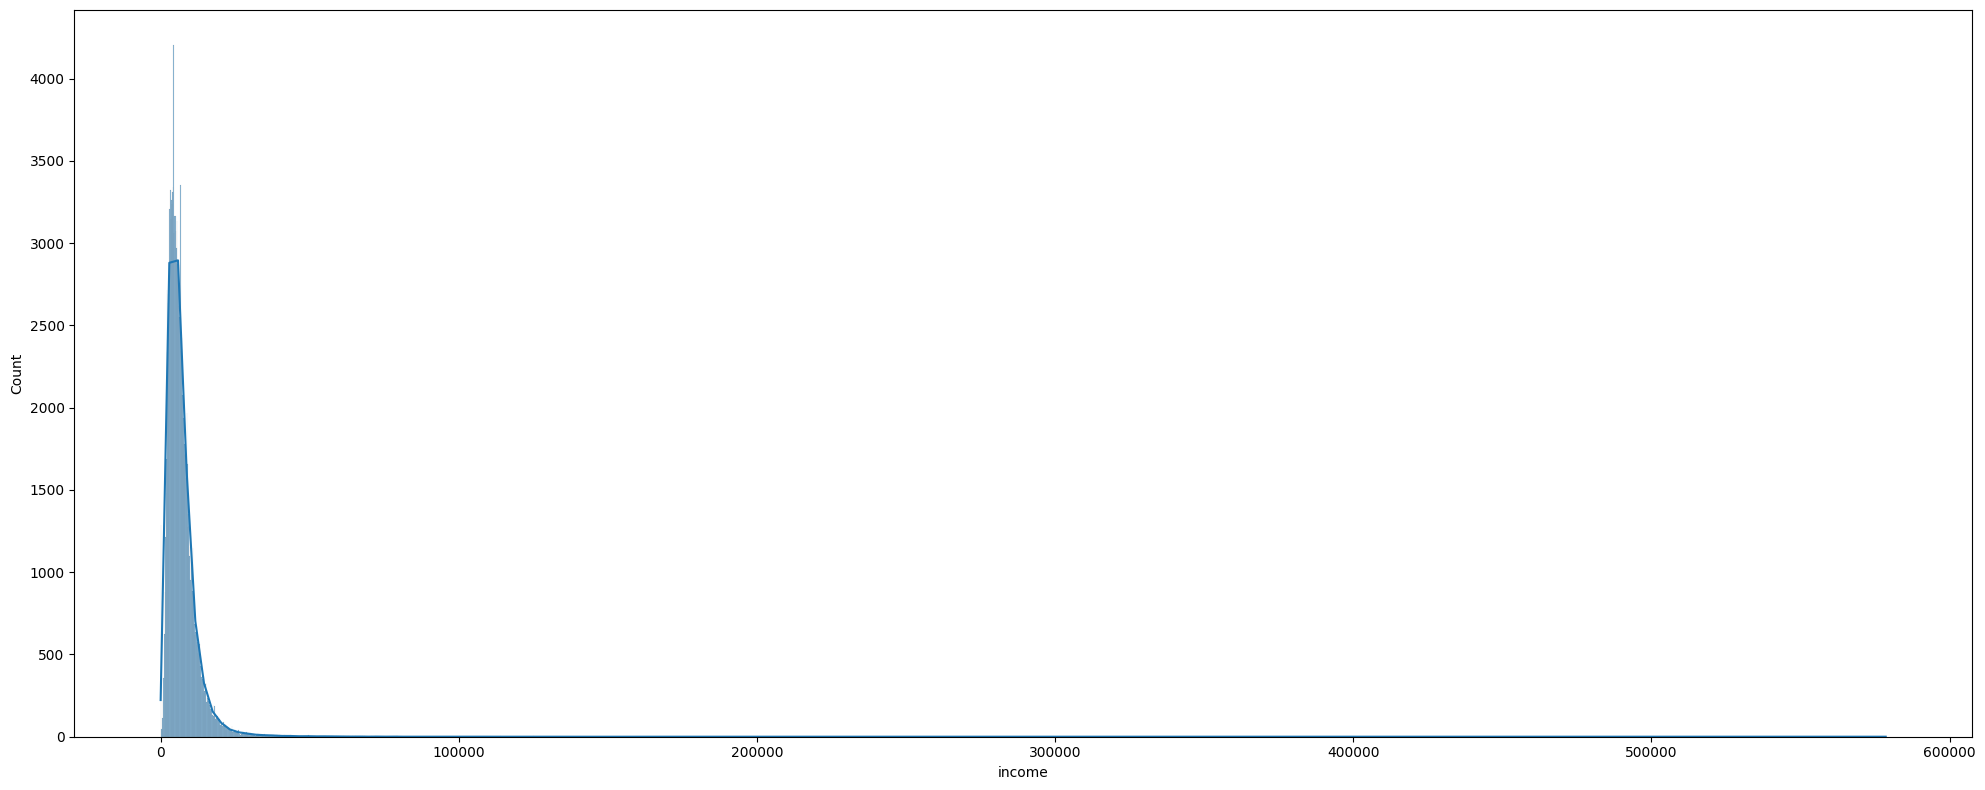

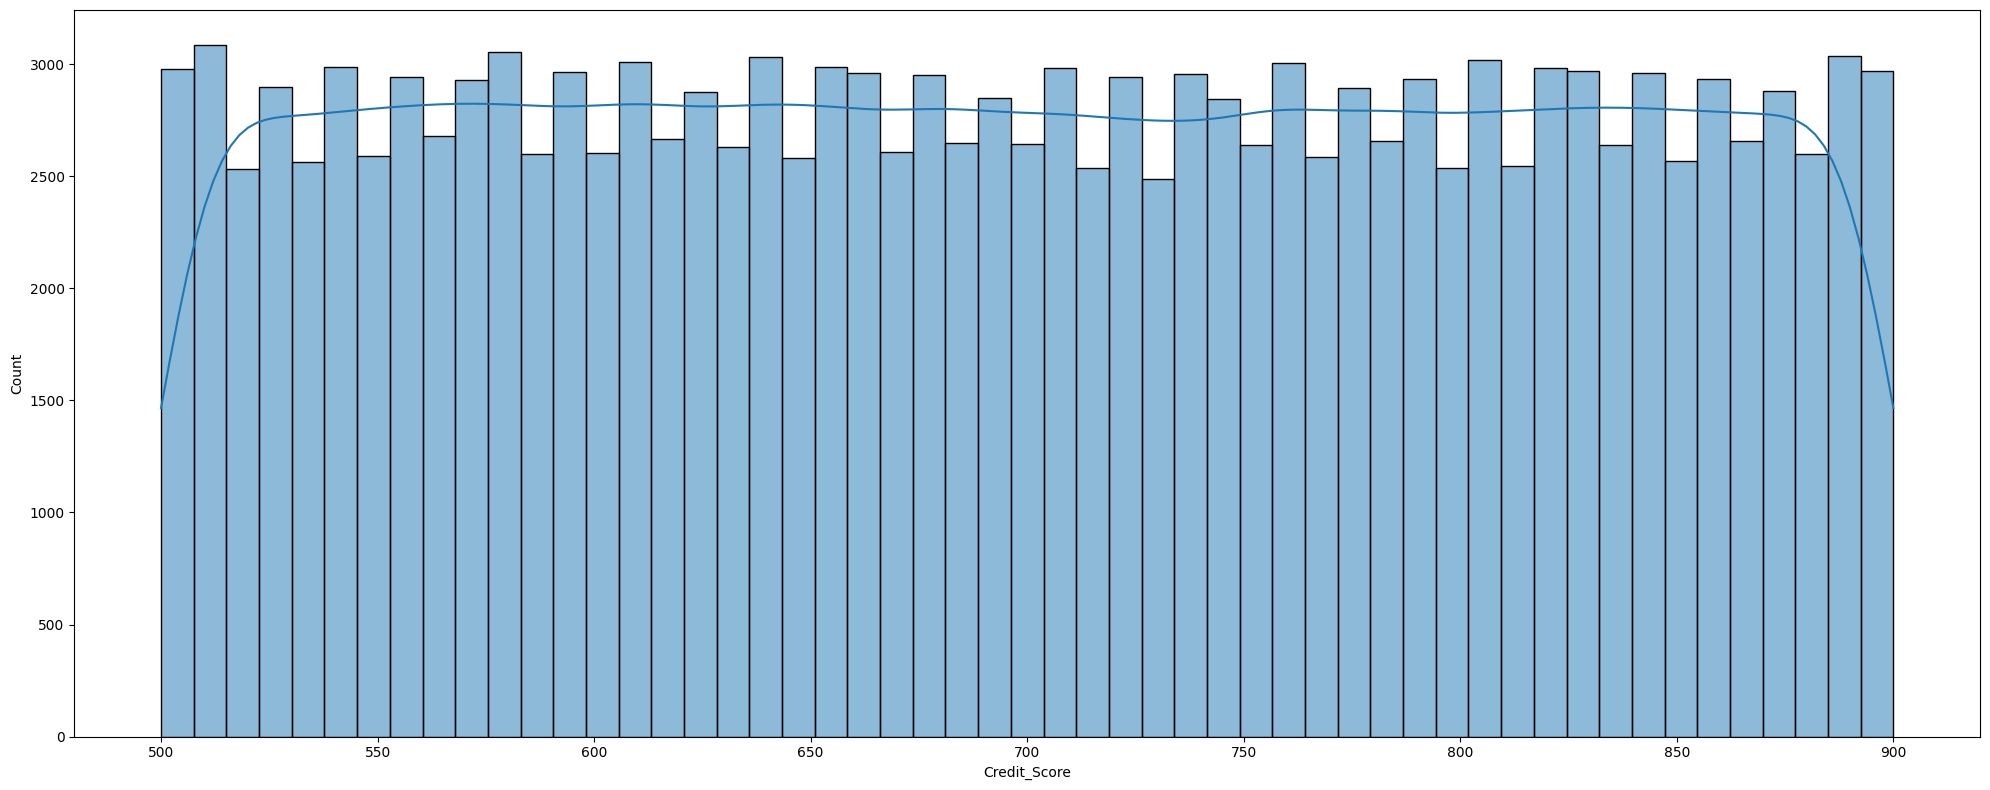

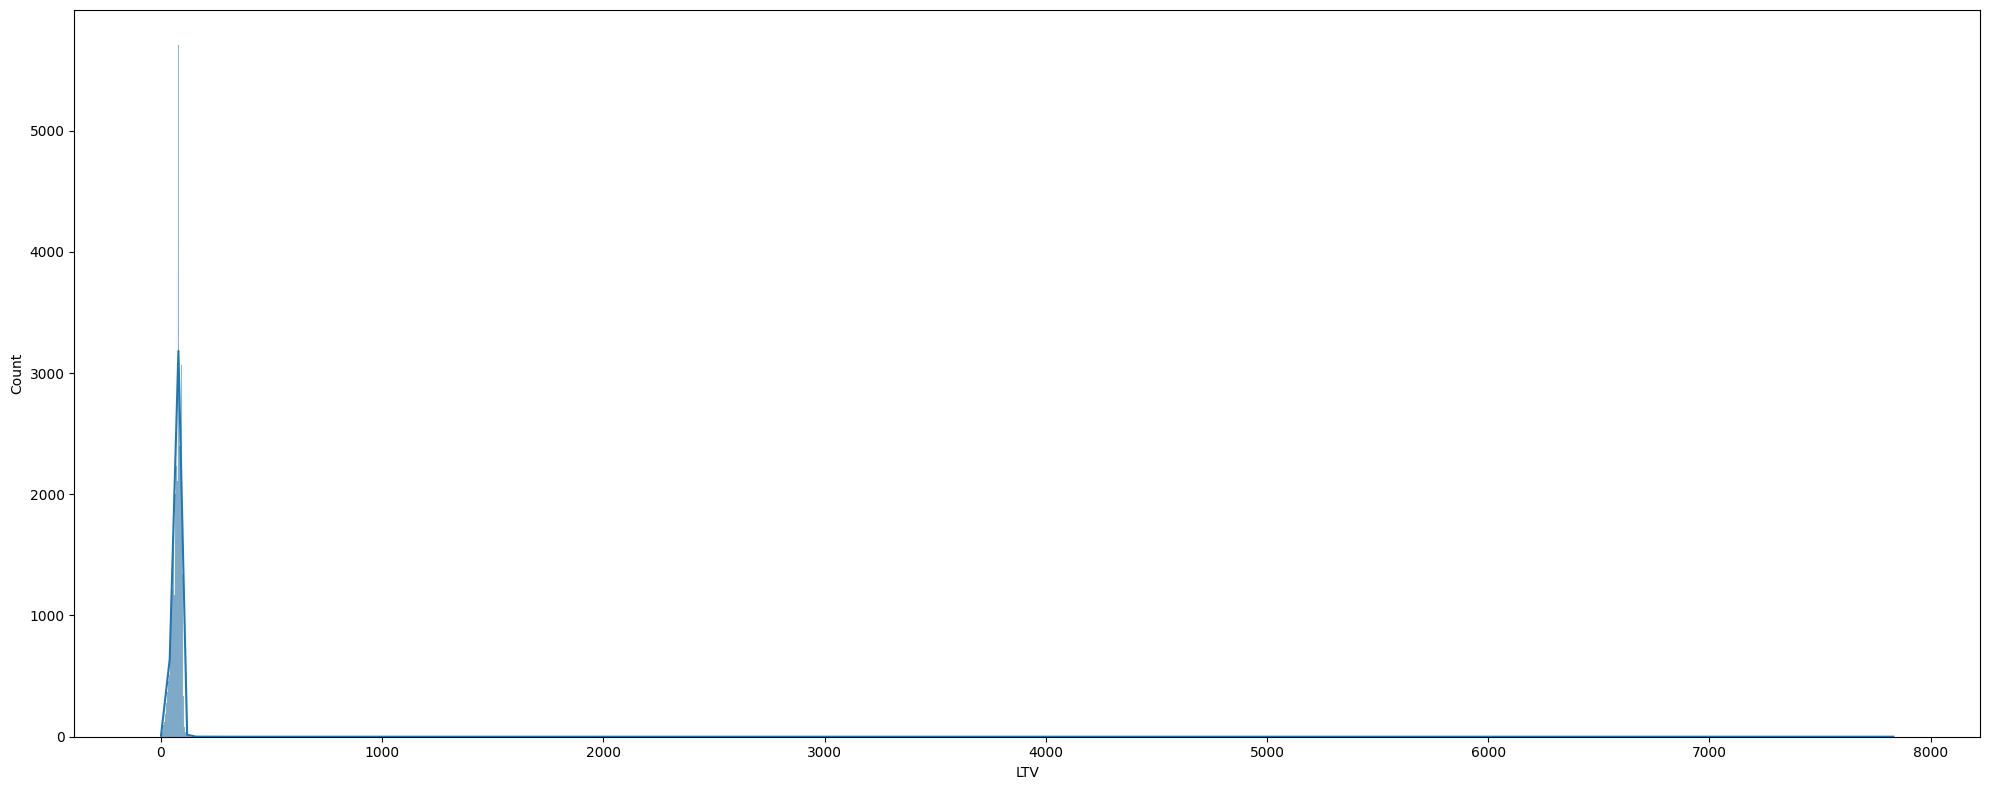

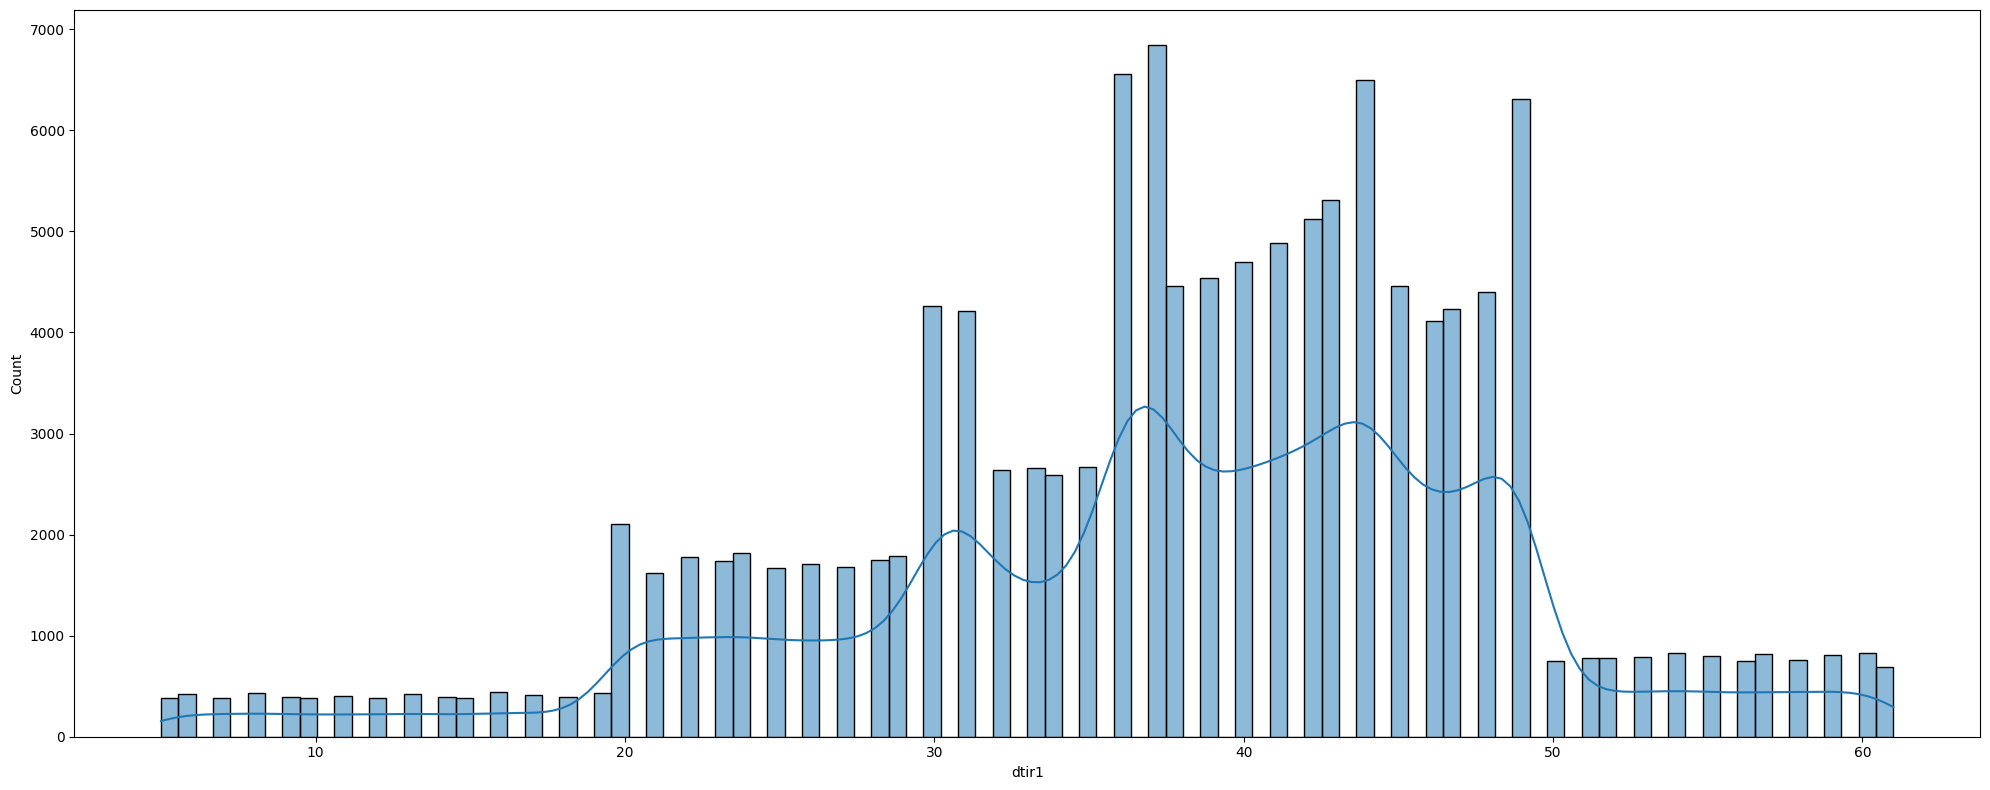

In [11]:
# Visualizing all the numerical columns
for cols in numeric_cols:
    plt.figure(figsize=(20, 8))
    sns.histplot(df[cols],kde=True)
    plt.tight_layout()
    plt.show()

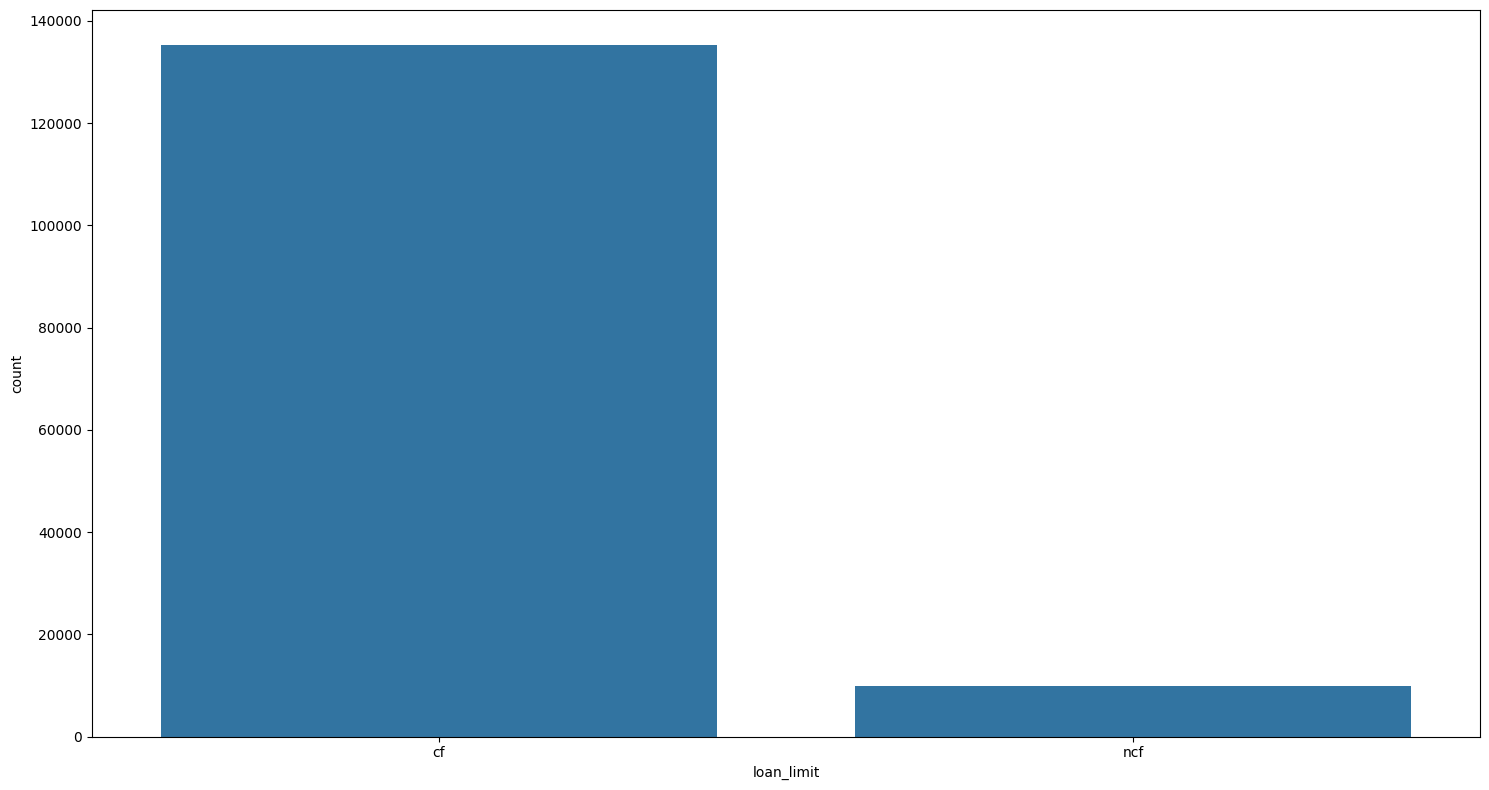

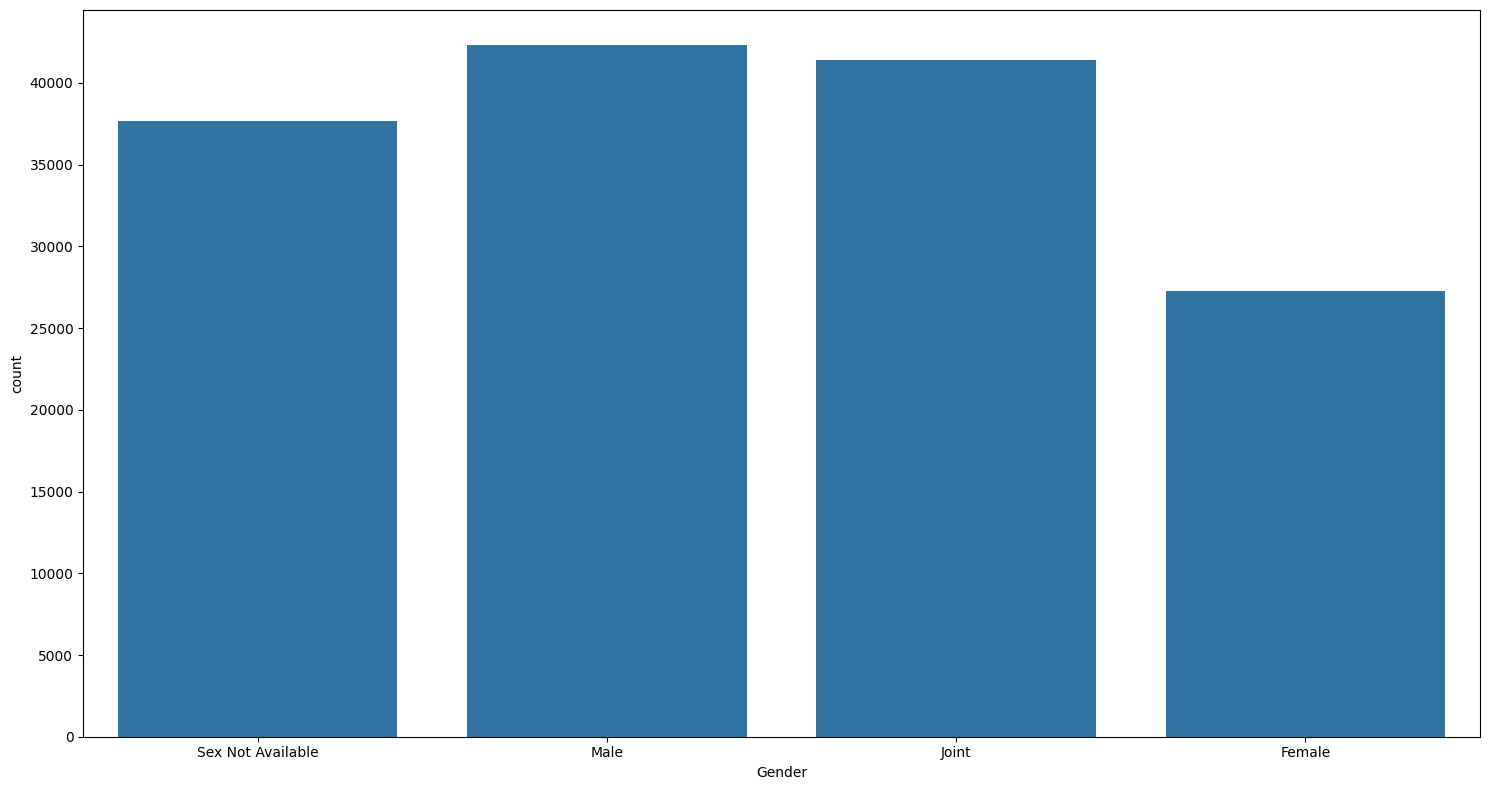

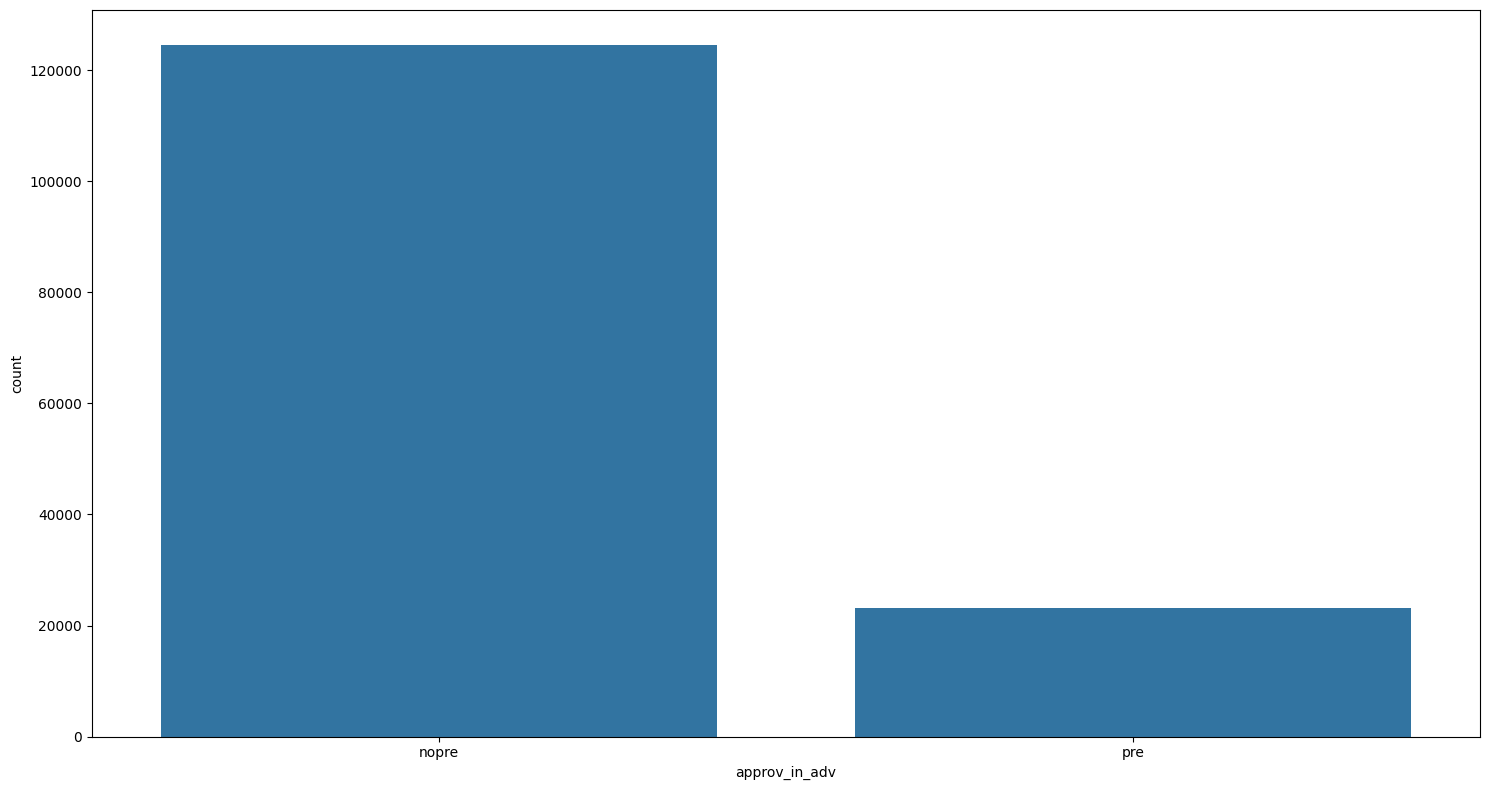

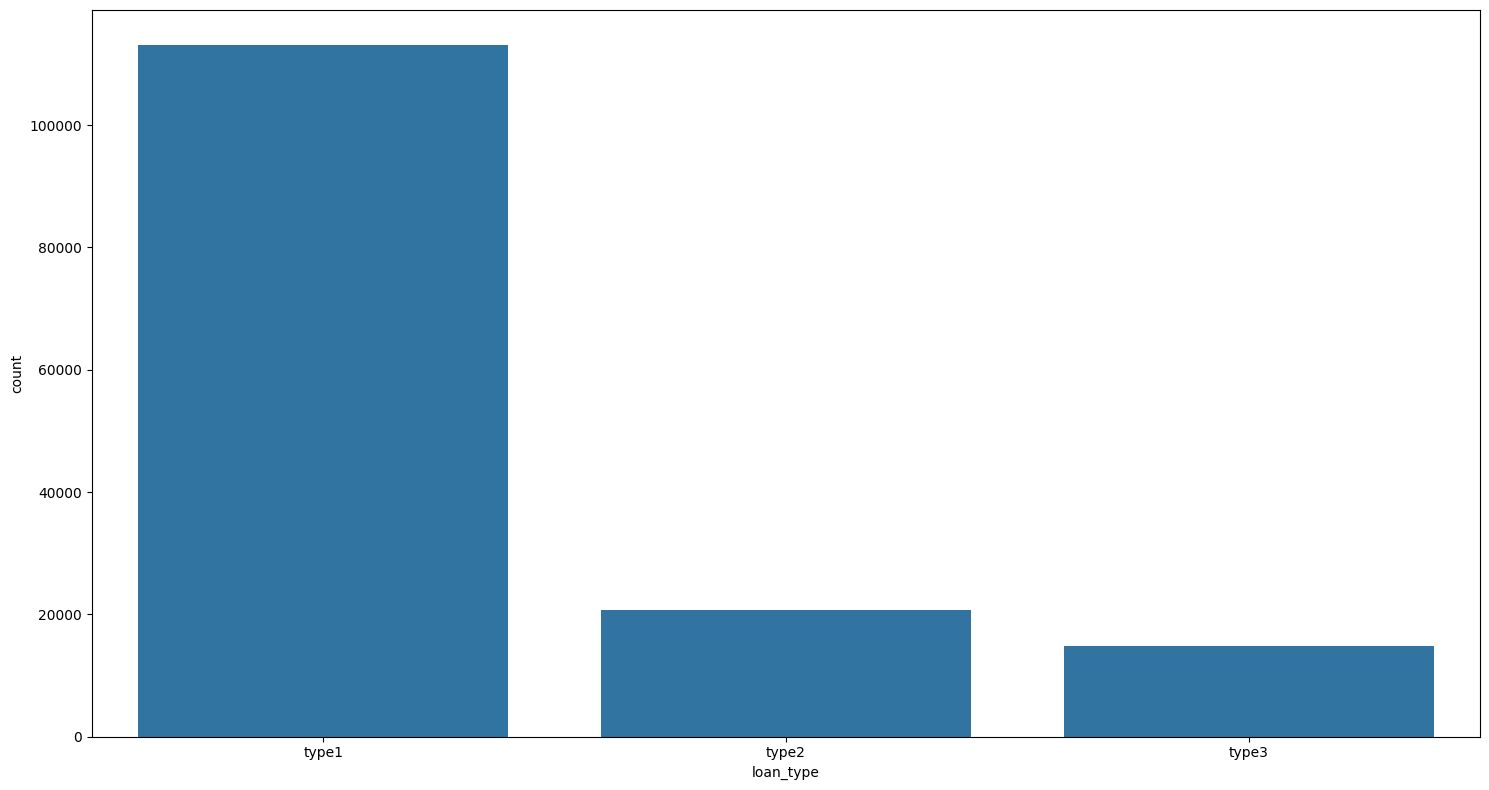

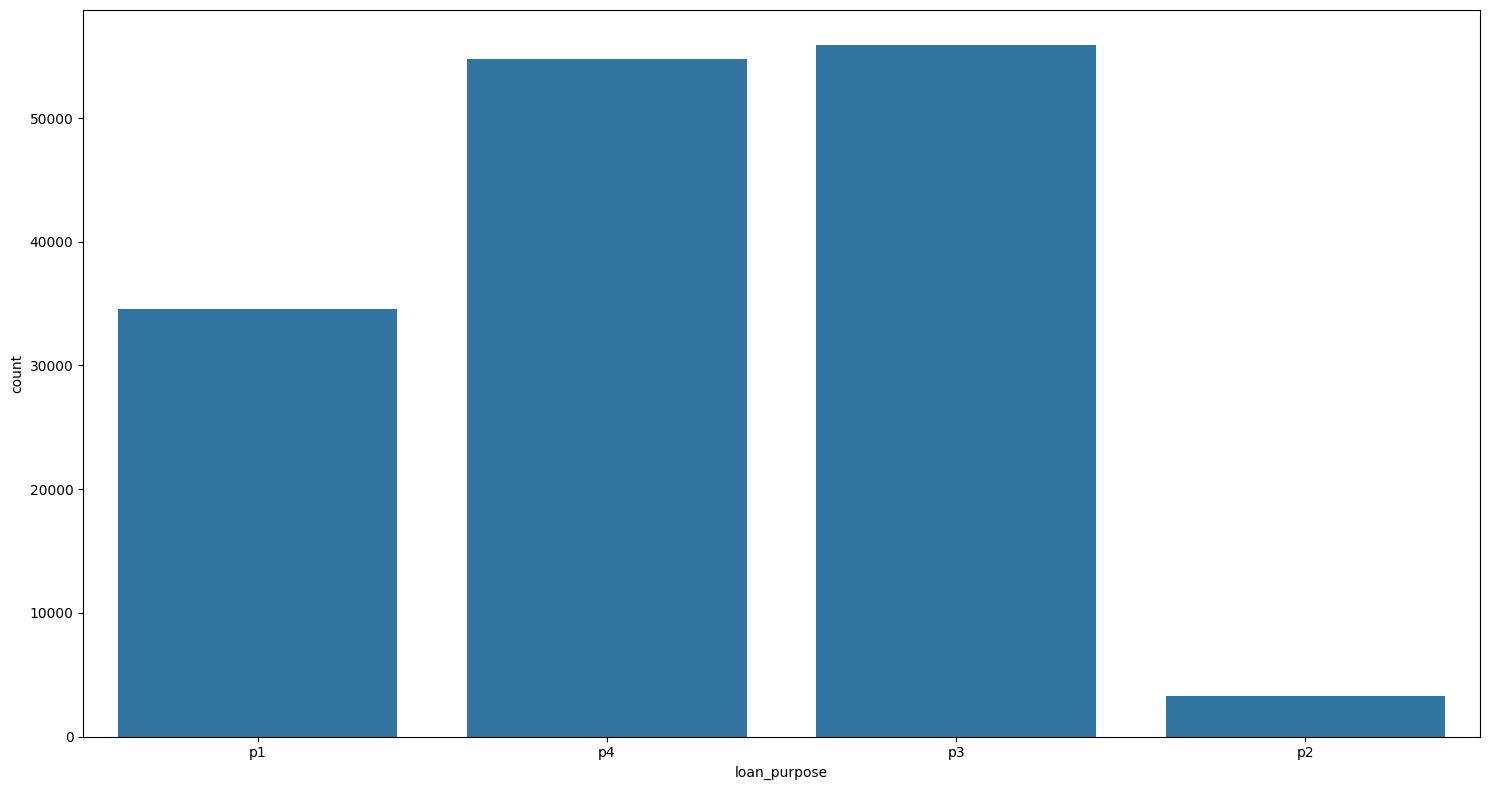

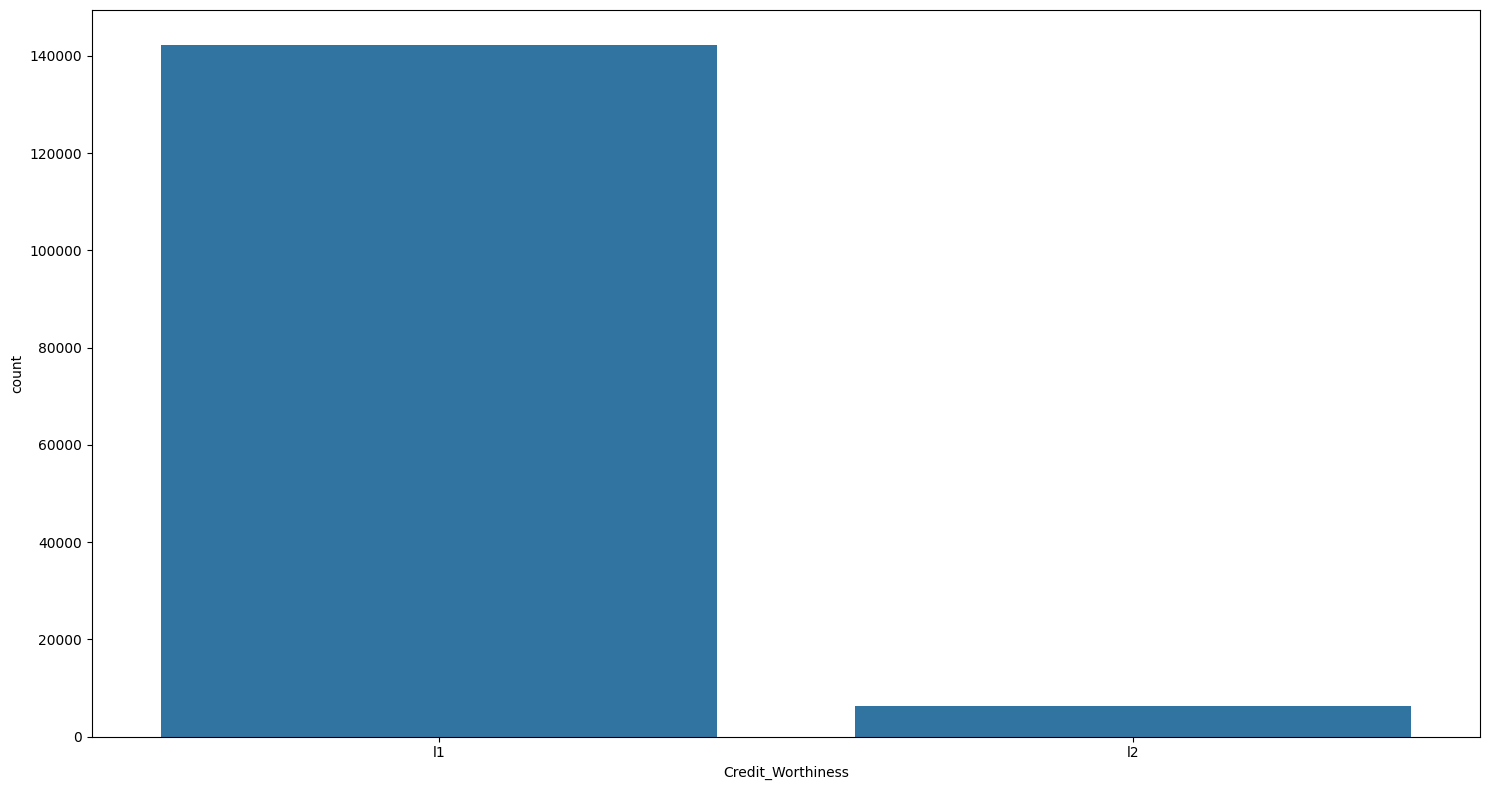

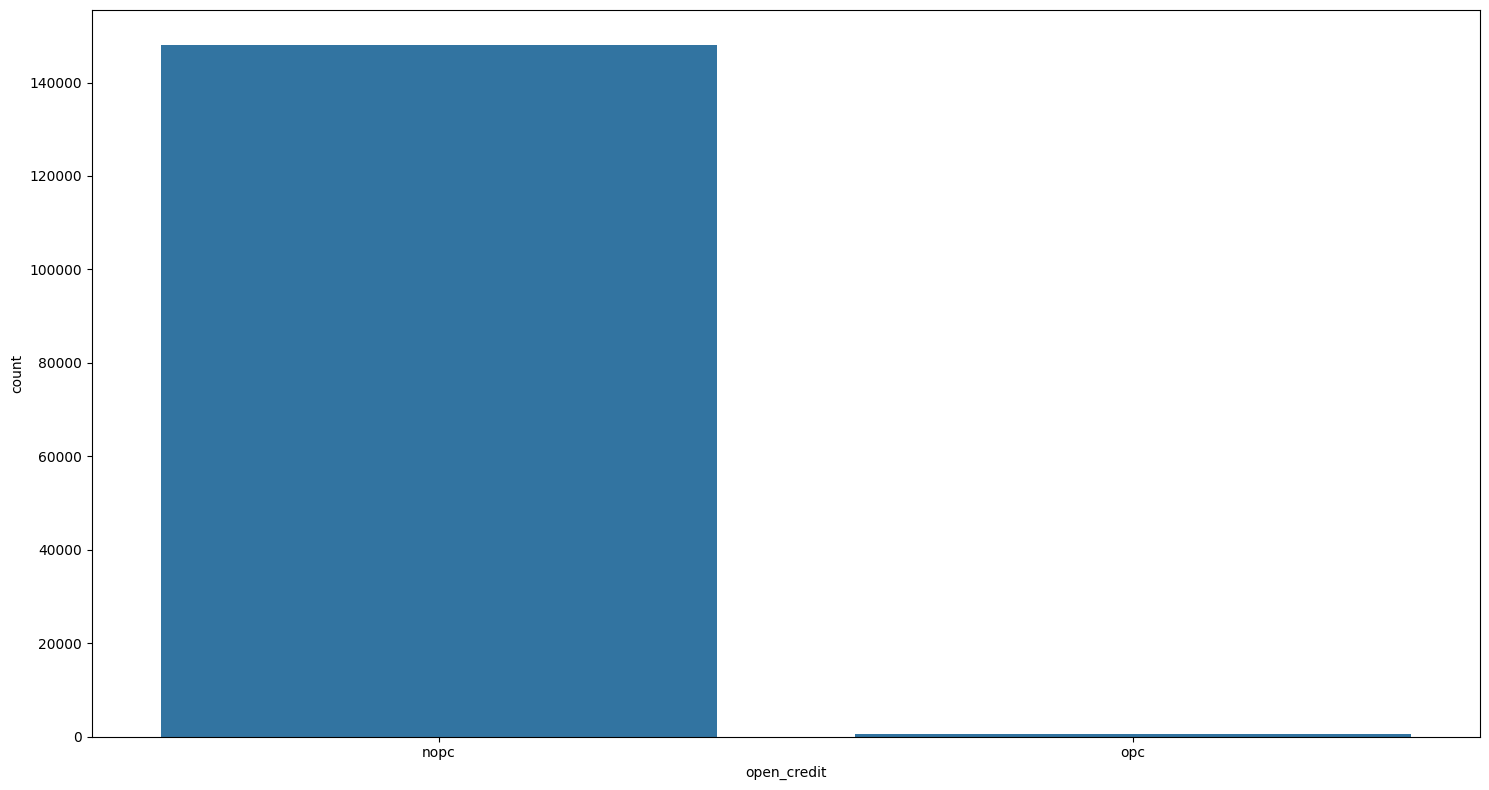

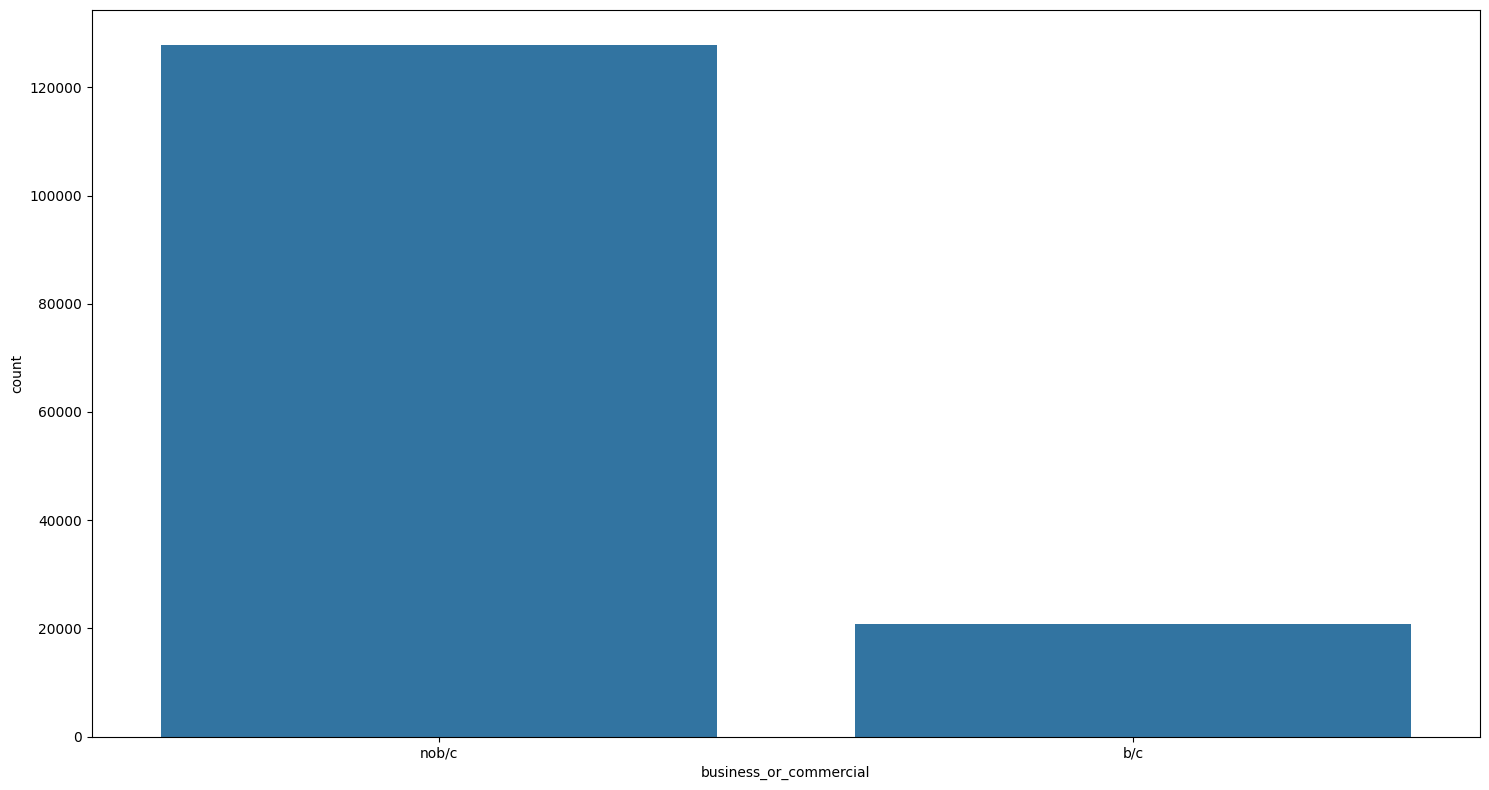

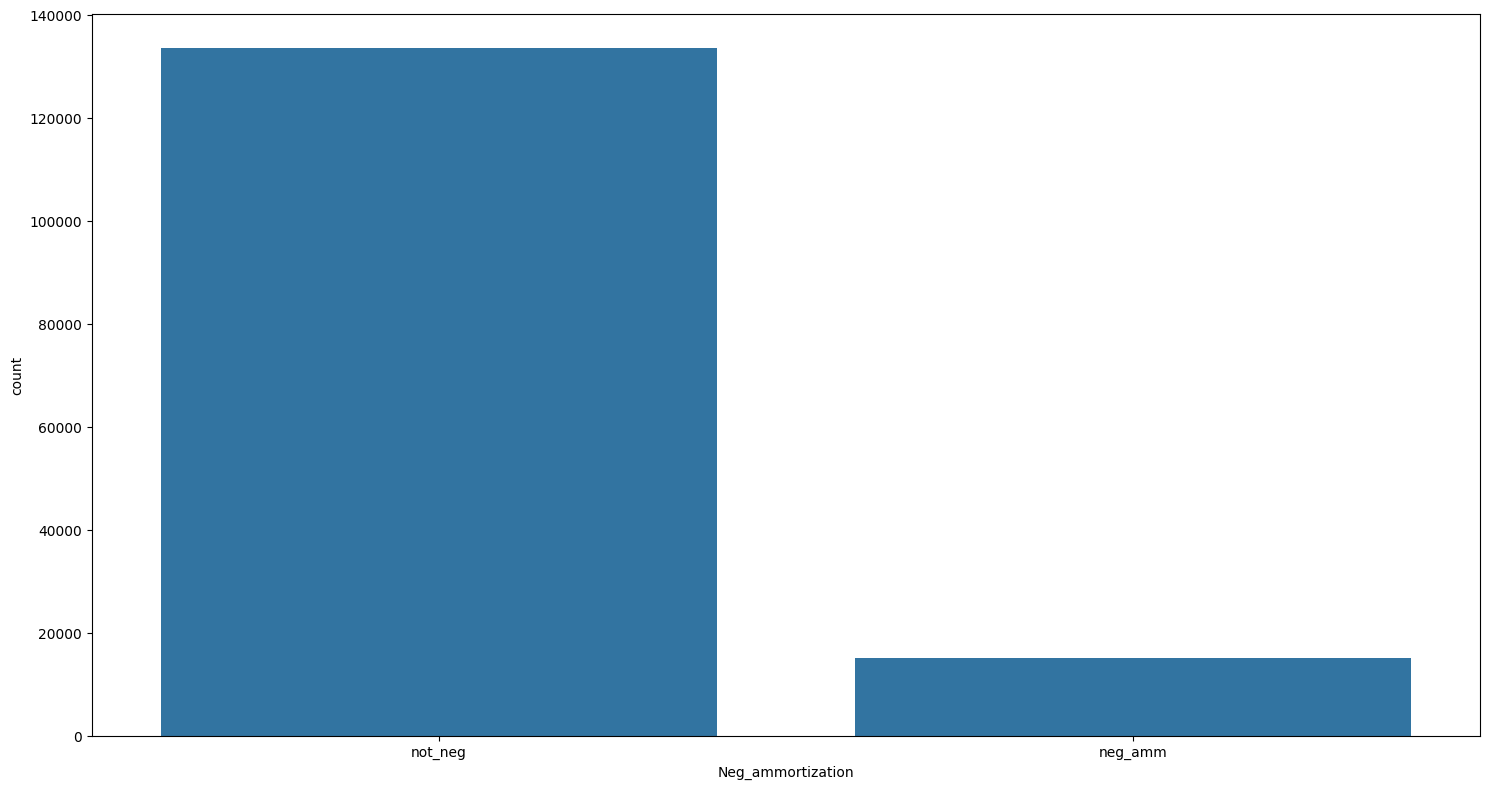

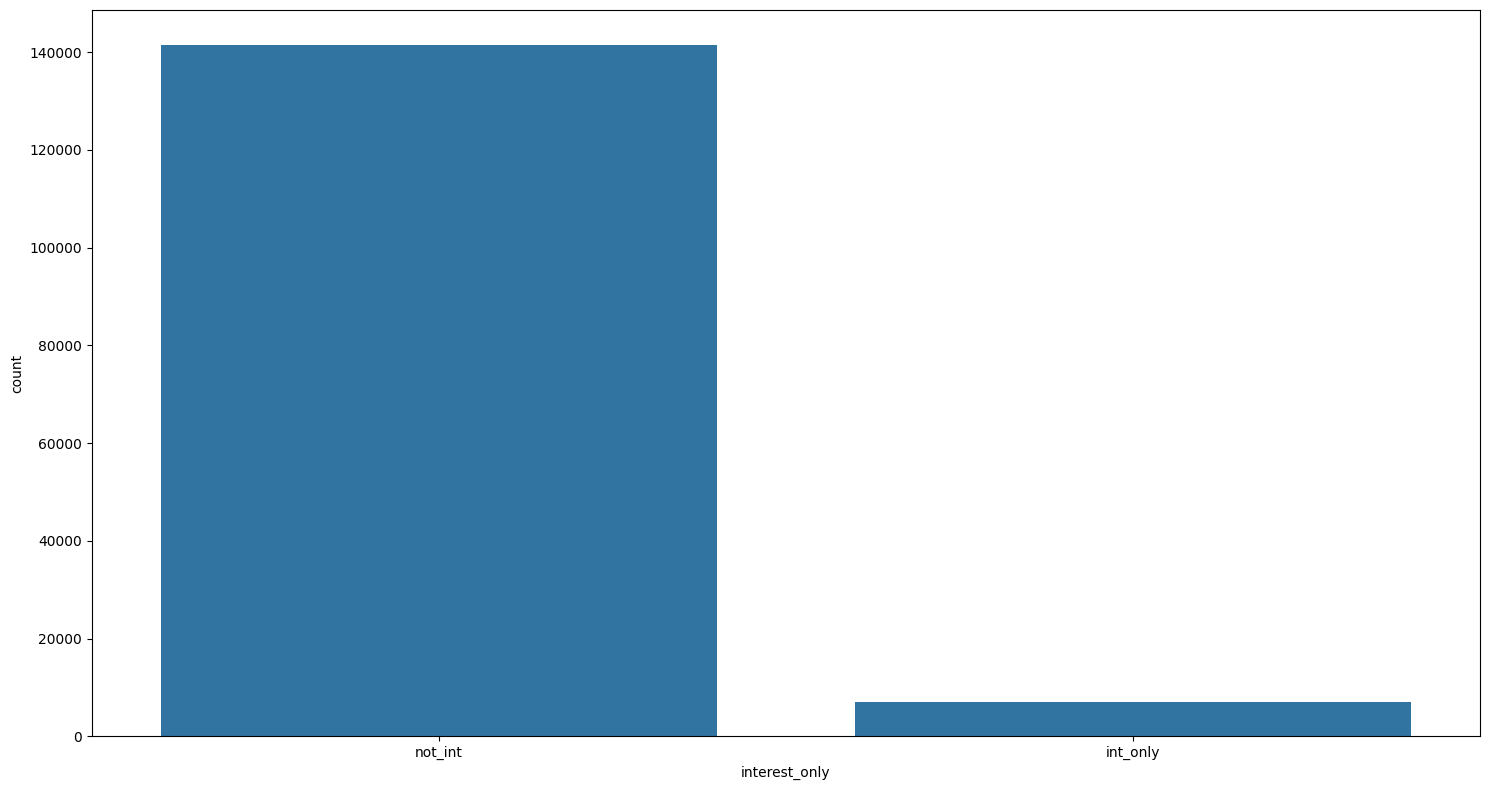

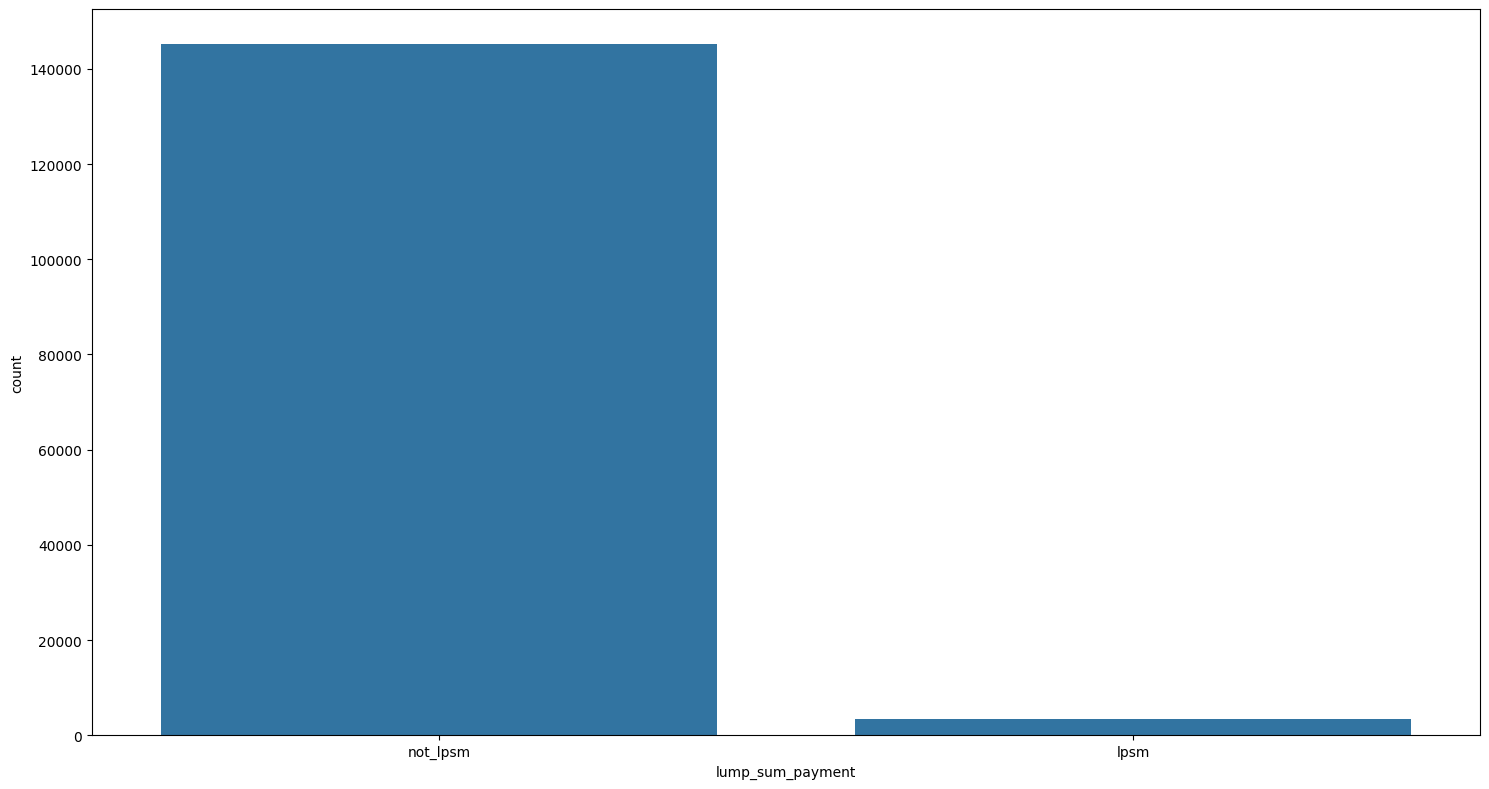

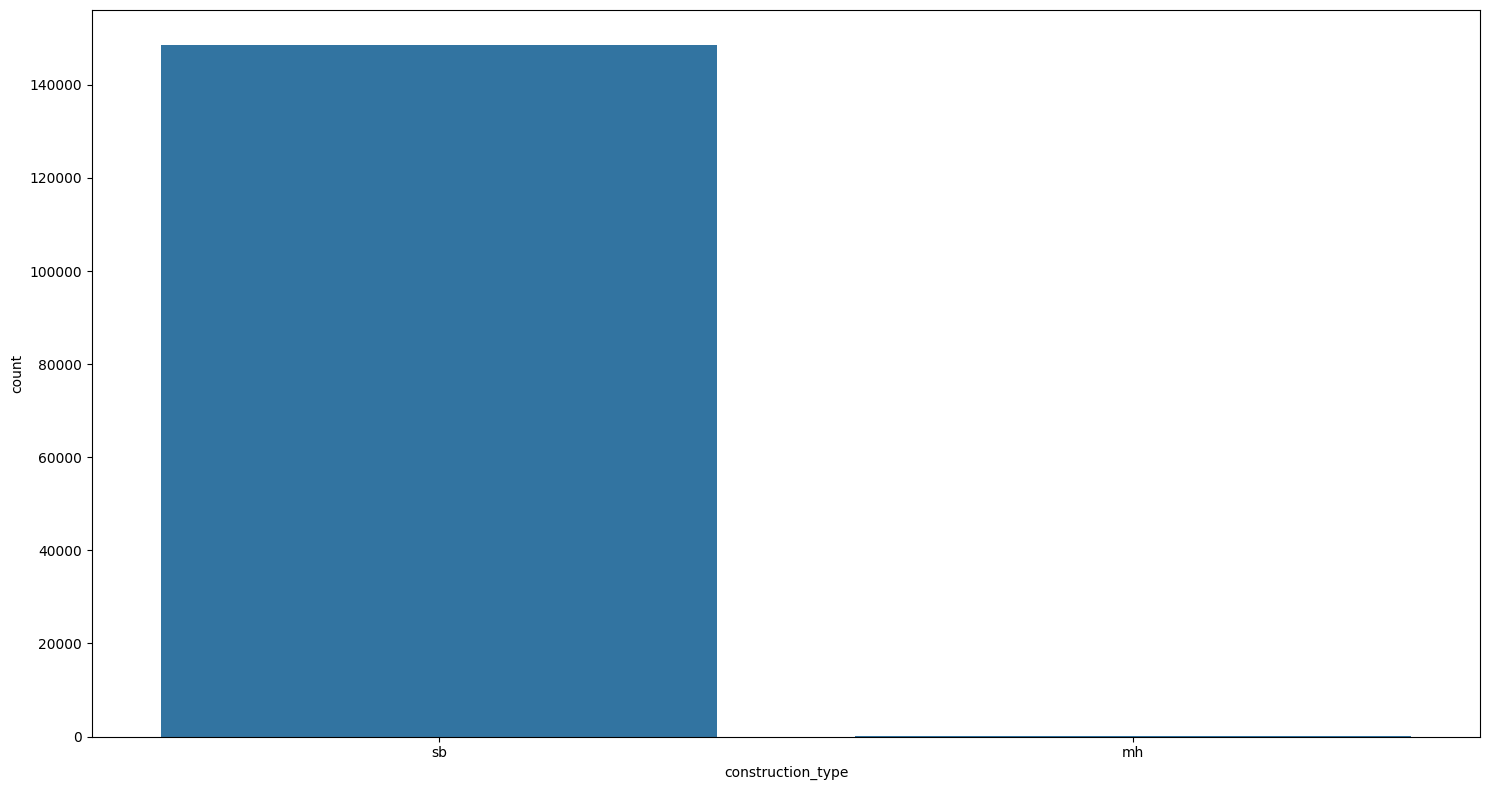

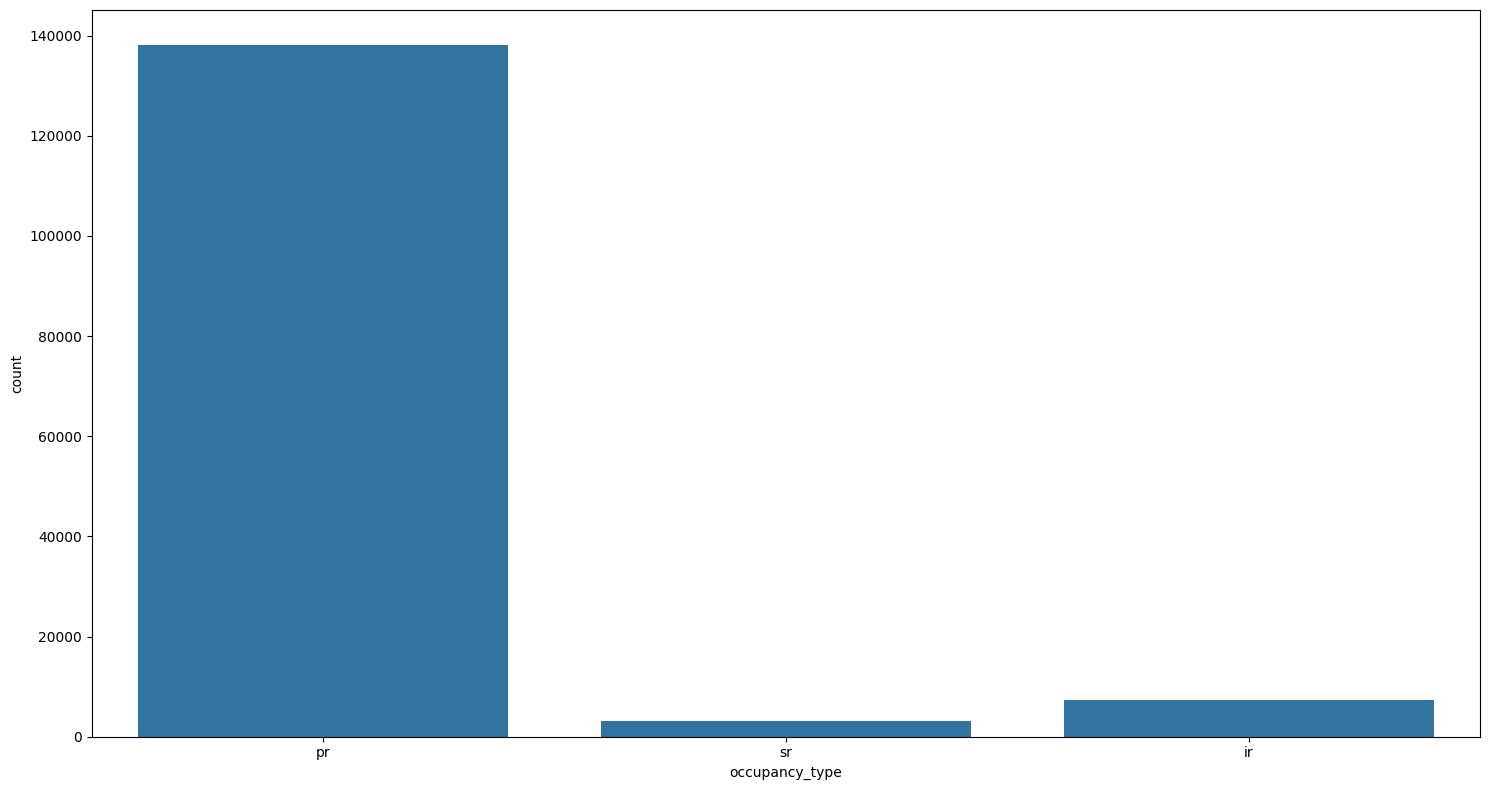

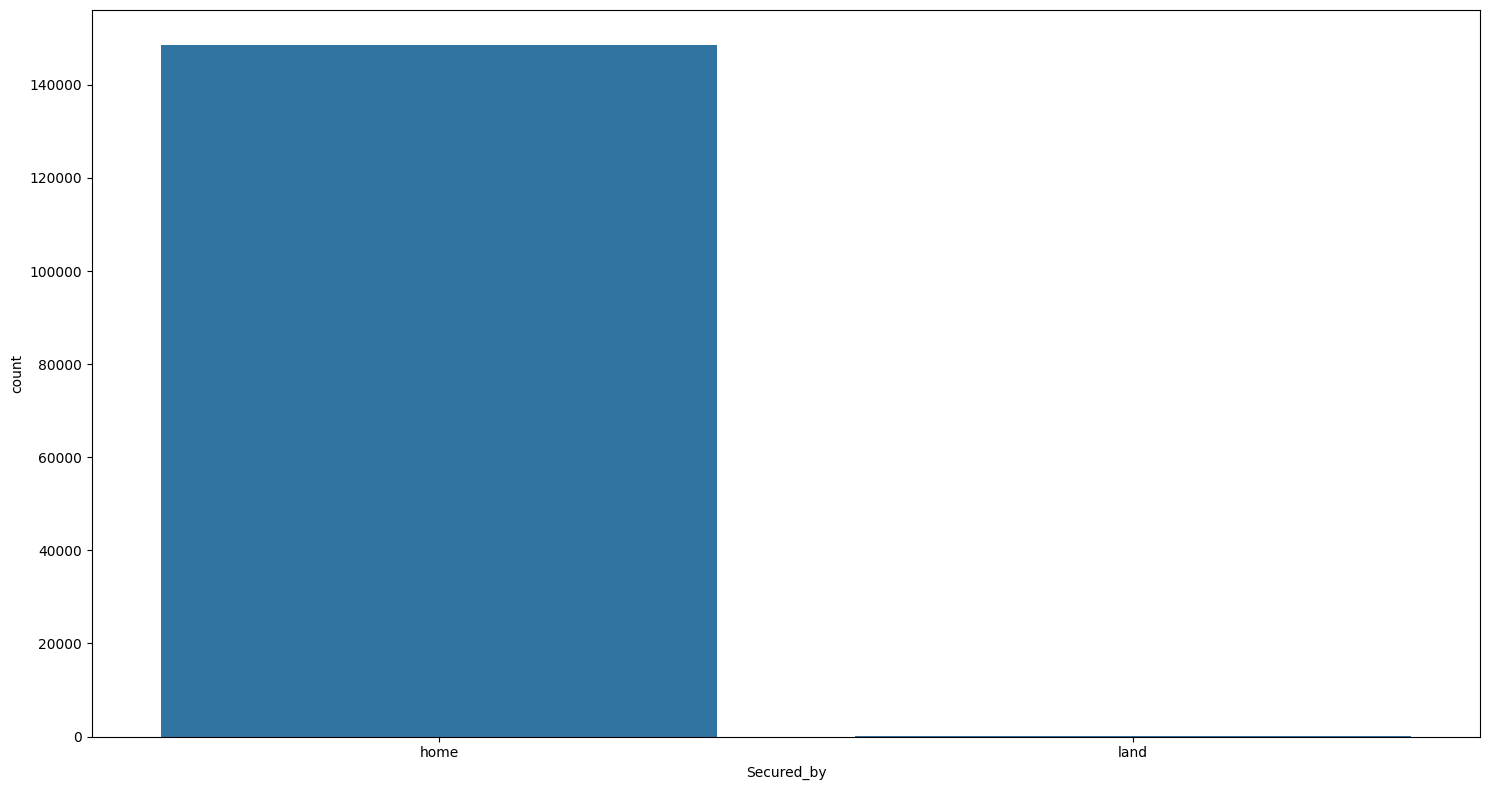

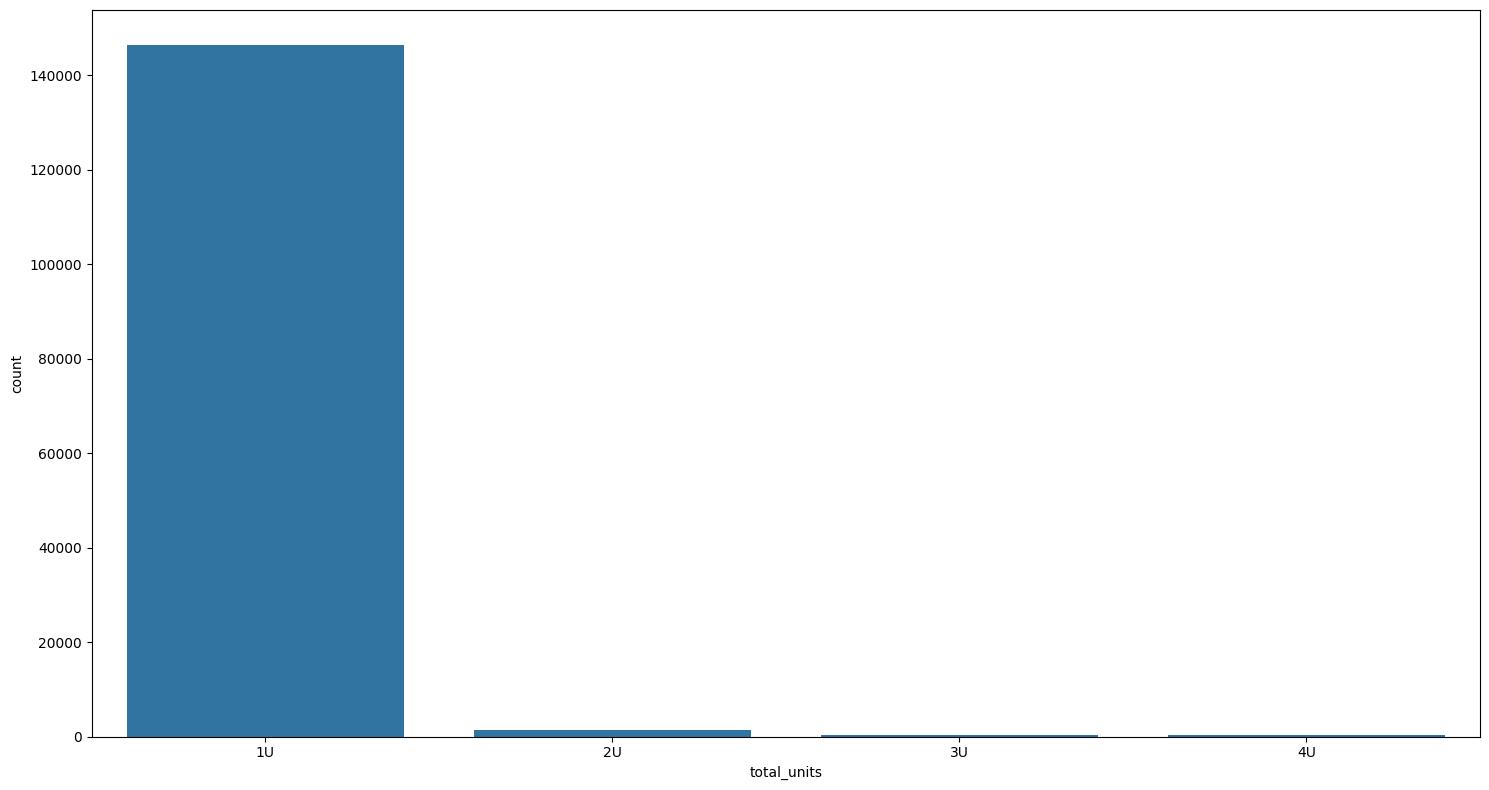

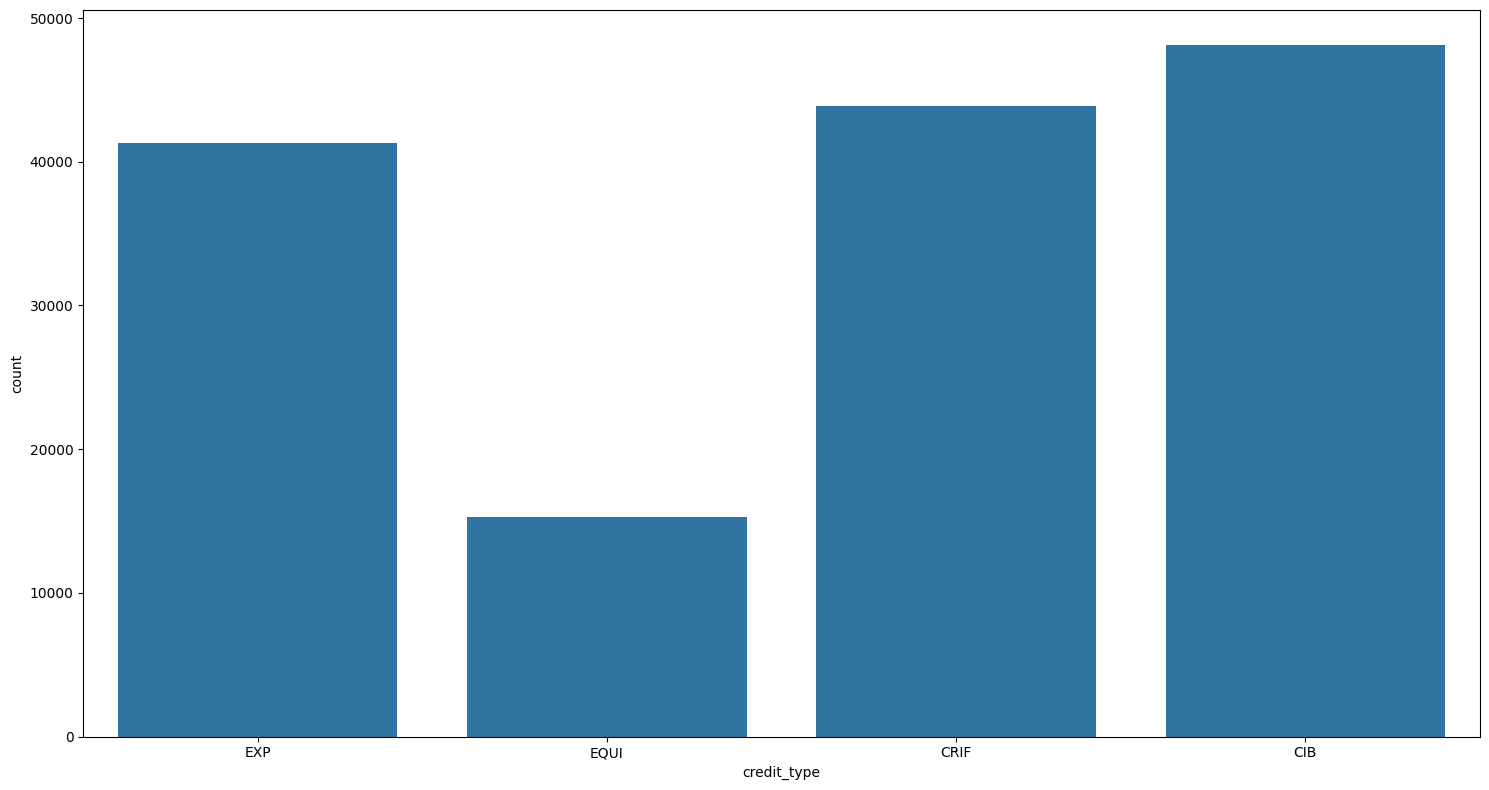

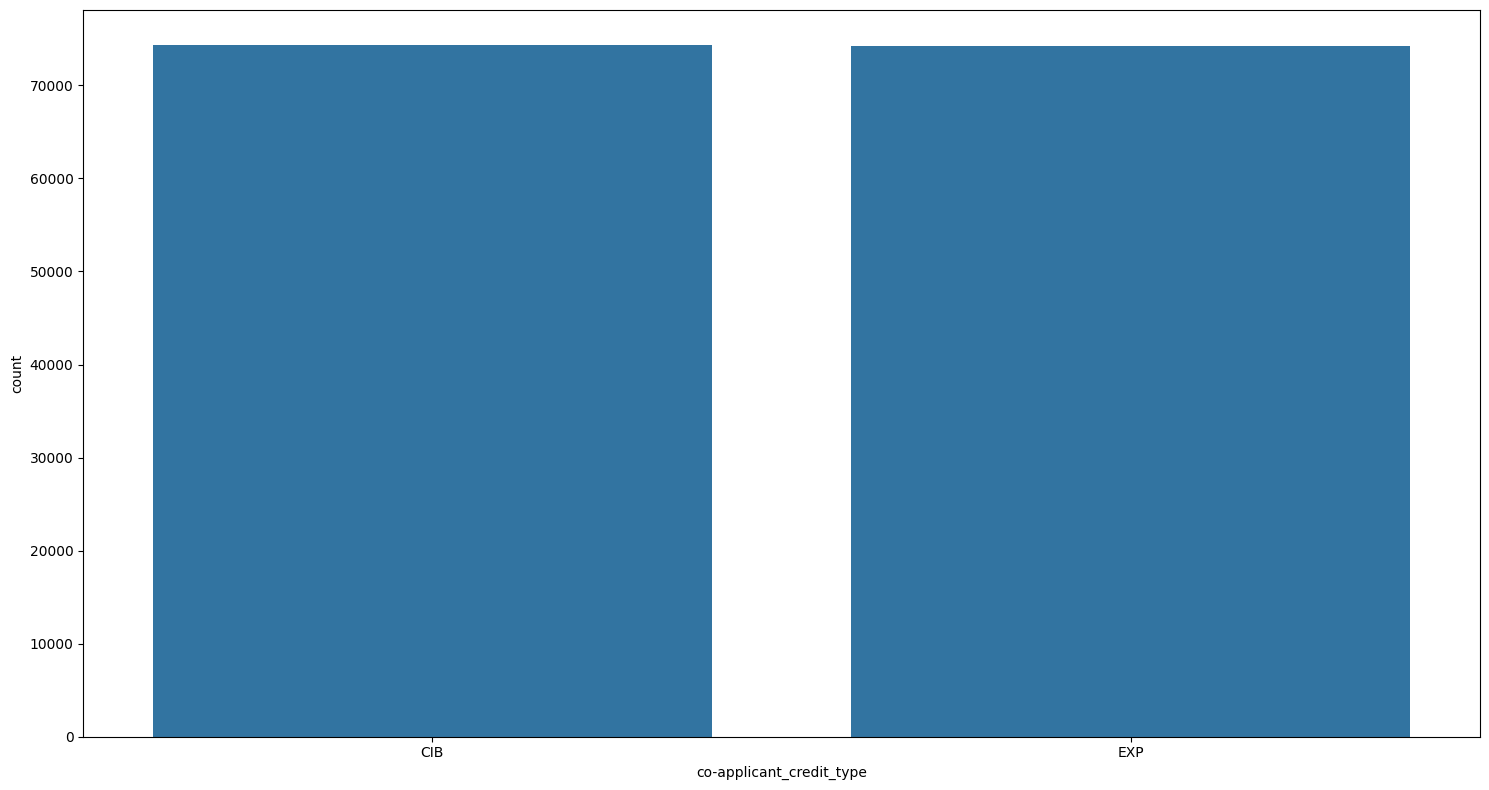

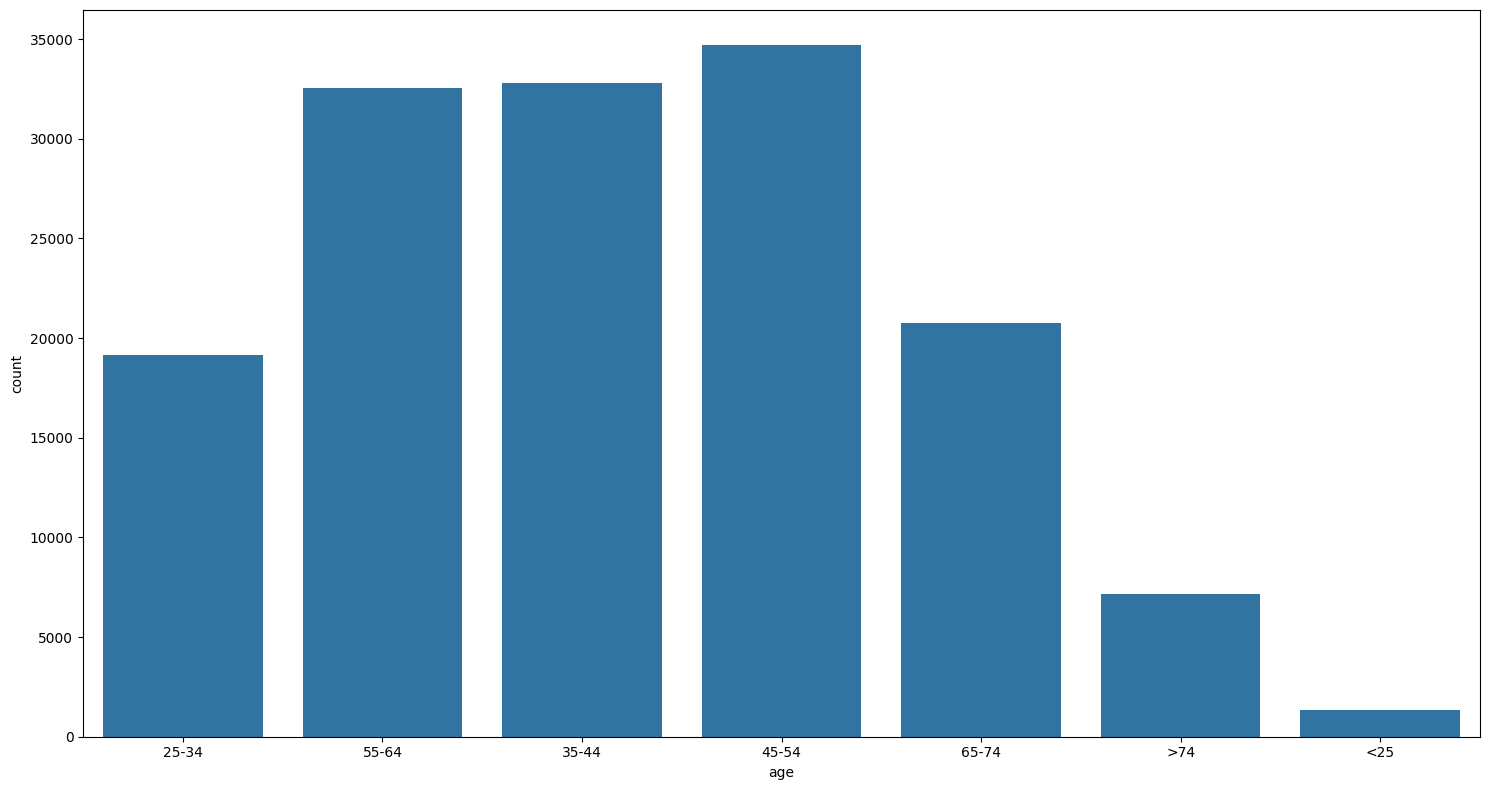

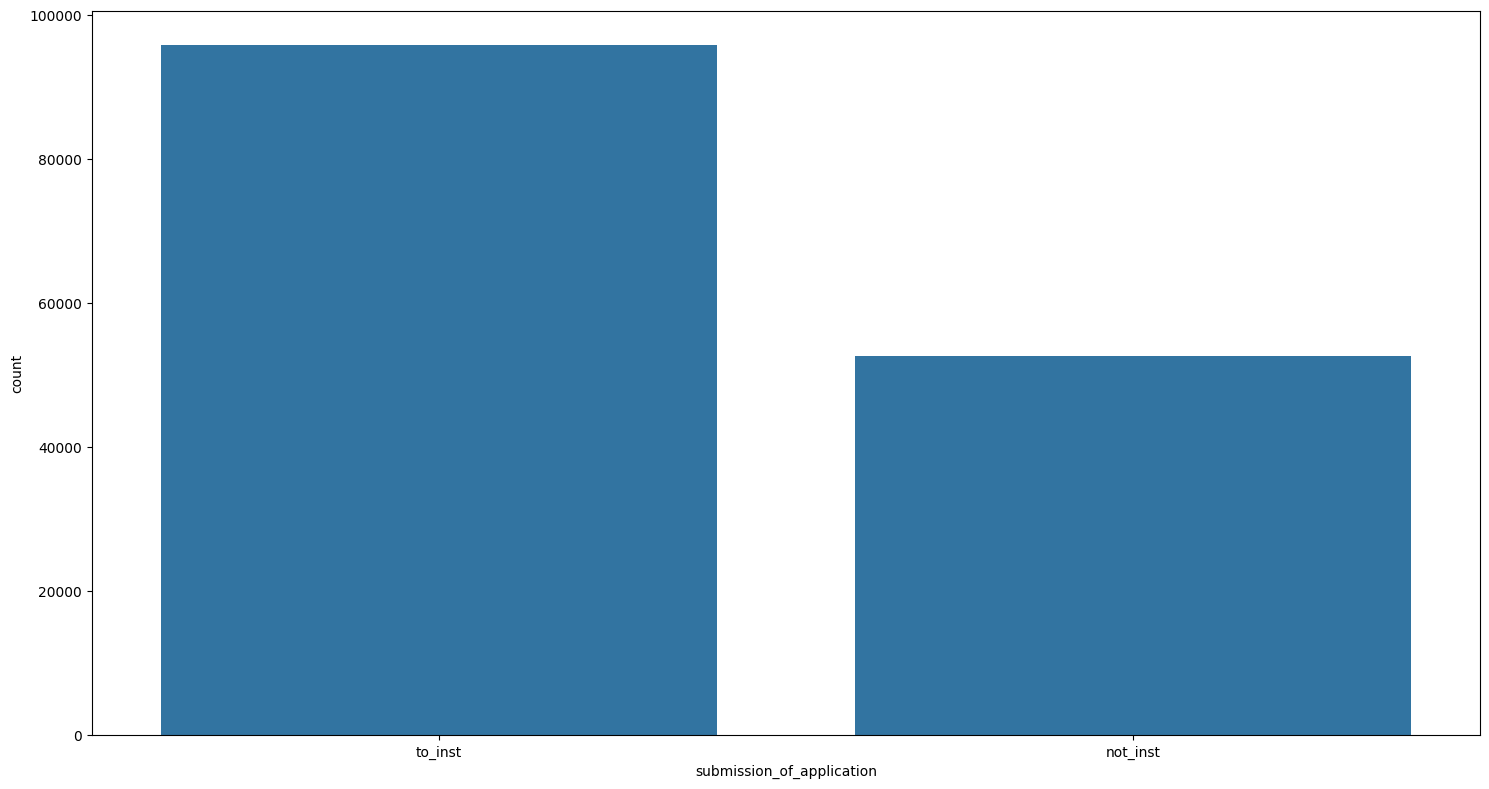

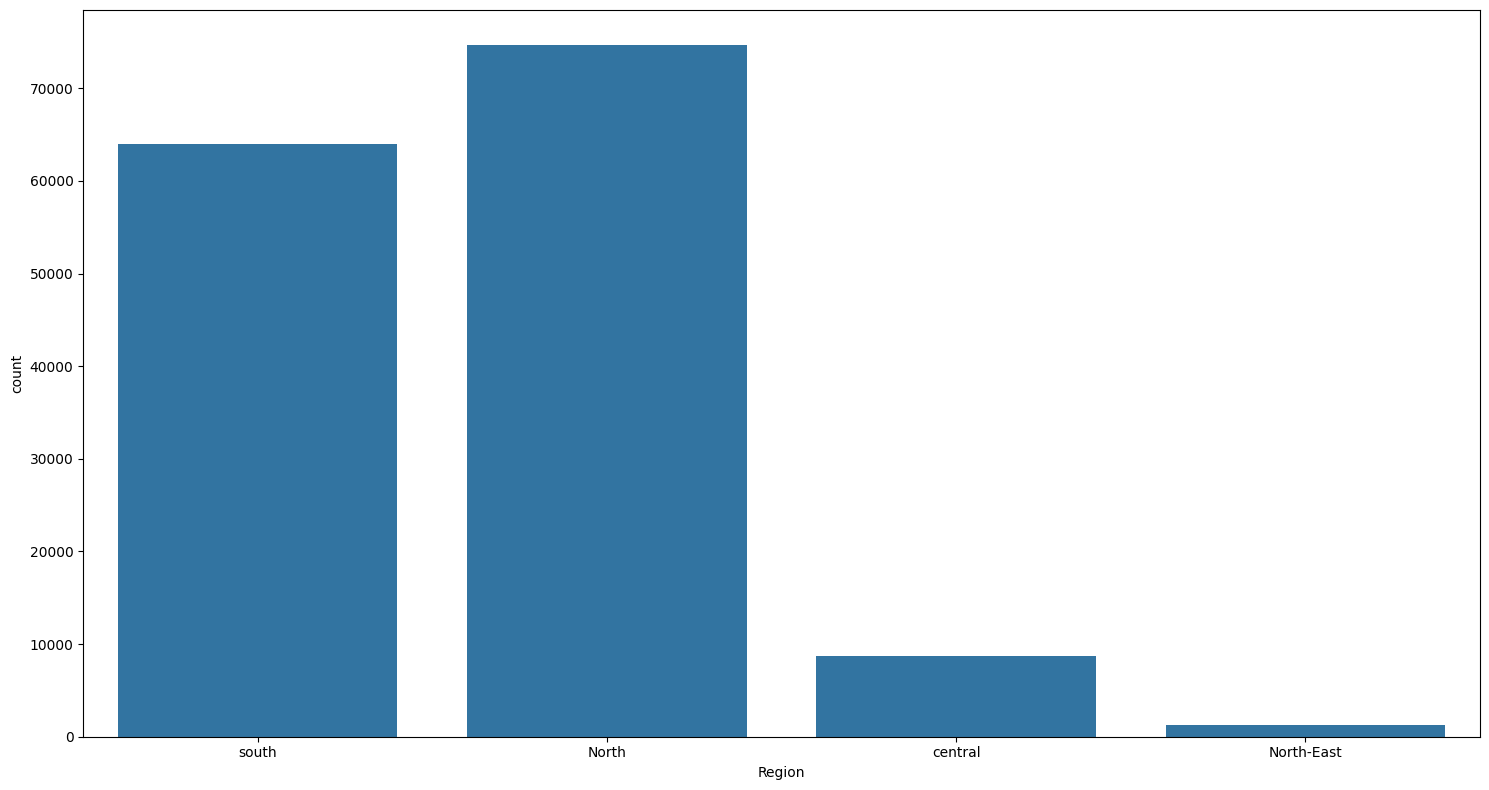

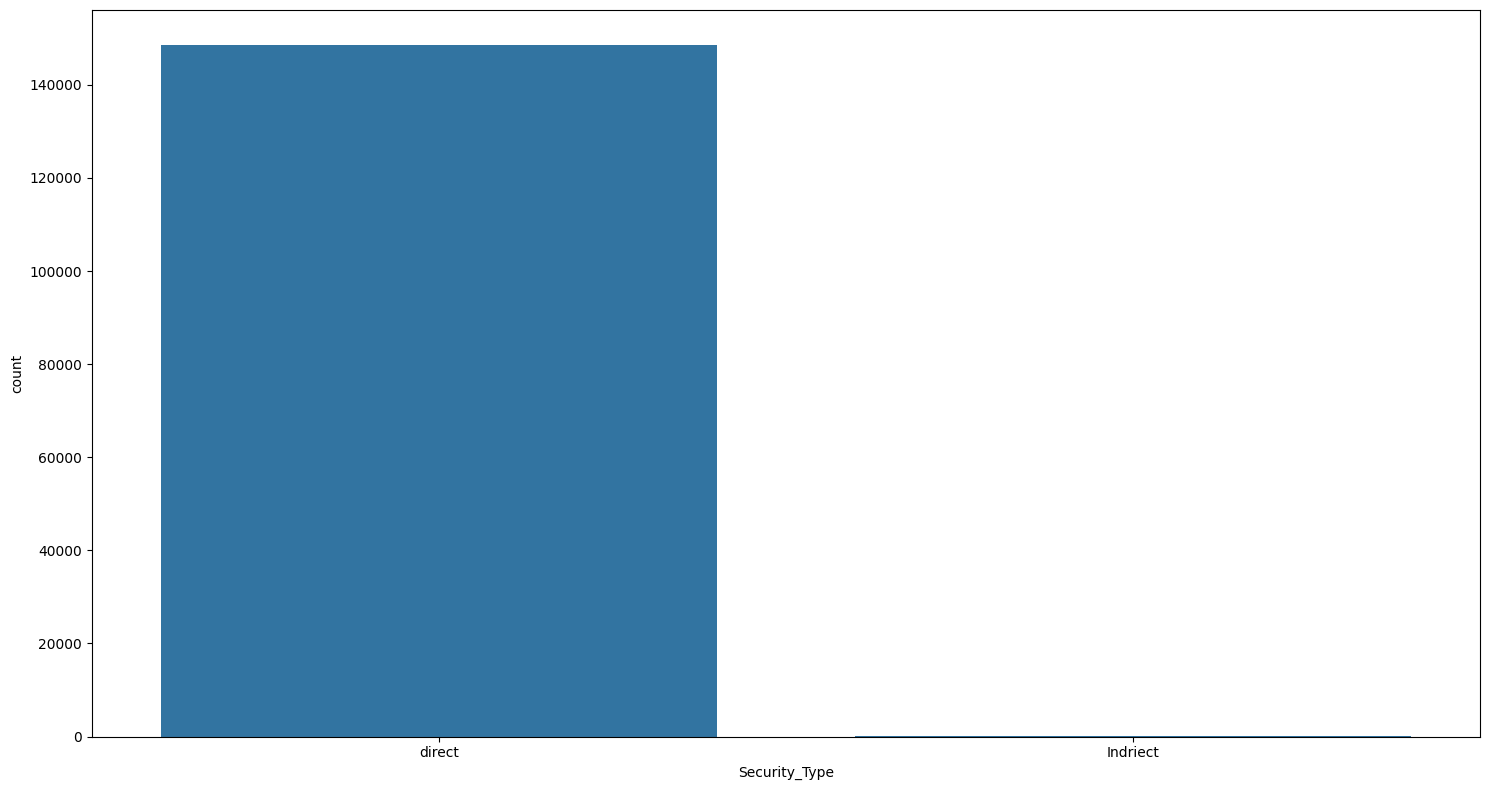

In [12]:
for cols in categorical_cols:
    plt.figure(figsize=(15, 8))
    sns.countplot(x = df[cols])
    plt.tight_layout()
    plt.show()

# Task
Visualize the correlation matrix of the numerical columns and the distribution of the target variable ('Status') in the dataframe.

## Visualize the correlation matrix

### Subtask:
Generate a heatmap of the correlation matrix of the numerical columns to understand the relationships between numerical features.


**Reasoning**:
Calculate and visualize the correlation matrix of the numerical columns using a heatmap.



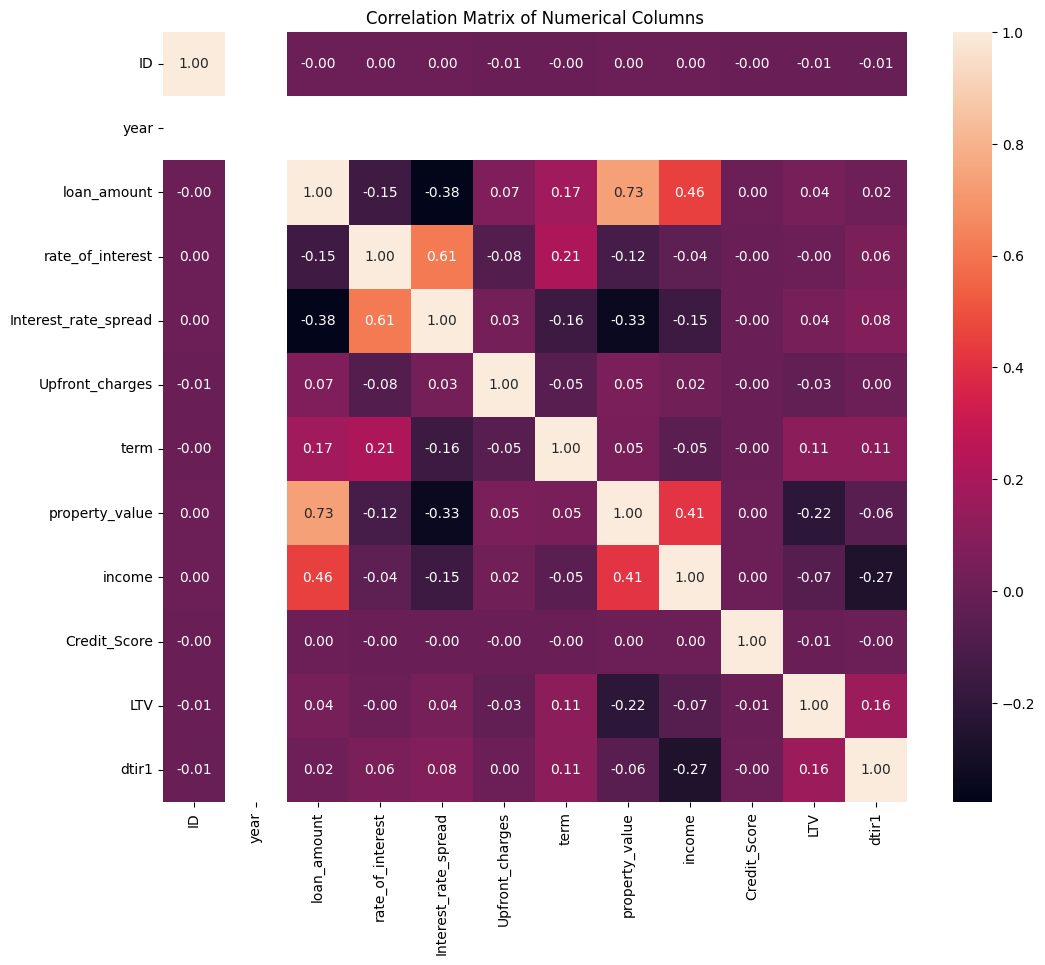

In [13]:
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Visualize the target variable distribution

### Subtask:
Create a countplot to visualize the distribution of the target variable ('Status').


**Reasoning**:
Create a countplot to visualize the distribution of the target variable ('Status').



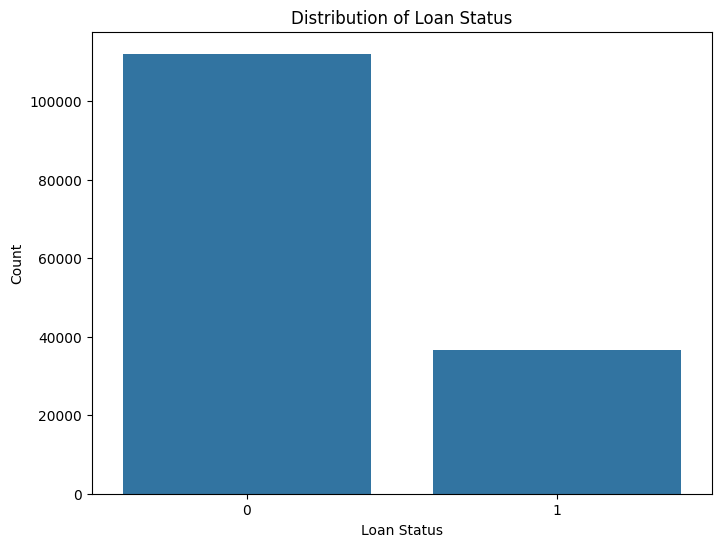

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [18]:
df_cleaned

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,29.0


In [19]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [20]:
df_cleaned

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,29.0


In [21]:
print(categorical_cols.unique())

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [22]:
target

,Status
0,1
1,1
2,0
3,0
4,0
...,...
148665,0
148666,0
148667,0
148668,0


In [23]:
print(numeric_cols)

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')


In [26]:
df_cleaned.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1'],
      dtype='object')

In [27]:
df_cleaned.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [31]:
df_cleaned

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct


In [32]:
df_cleaned.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [33]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
numeric_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'Credit_Score', 'LTV'],
      dtype='object')

In [34]:
categorical_cols =  df_cleaned.select_dtypes(include='object').columns
categorical_cols

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

### Finding the numerical columns with null values

In [36]:
df_cleaned[numeric_cols].isnull().sum()

,0
ID,0
year,0
loan_amount,0
rate_of_interest,36439
term,41
property_value,15098
income,9150
Credit_Score,0
LTV,15098


###Finding out categorical columns with null values

In [37]:
df_cleaned[categorical_cols].isnull().sum()

,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
Neg_ammortization,121
interest_only,0


###Filling out the null values in numerical columns with median

In [38]:
for cols in numeric_cols:
    df_cleaned[cols].fillna(df_cleaned[cols].median(), inplace=True)

In [39]:
df_cleaned[numeric_cols].isnull().sum()

,0
ID,0
year,0
loan_amount,0
rate_of_interest,0
term,0
property_value,0
income,0
Credit_Score,0
LTV,0


###Filling out the null values in categorical columns with mode

In [40]:
for cols in categorical_cols:
    df_cleaned[cols].fillna(df_cleaned[cols].mode()[0], inplace=True)

In [41]:
df_cleaned[categorical_cols].isnull().sum()

,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
Neg_ammortization,0
interest_only,0


###Checking the df_cleaned again to see if there are still any null values

In [42]:
df_cleaned.isnull().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


###After checking you can observe that there are now no null values in df_cleaned and it's now suitable for encoding the values.

In [43]:
df_cleaned

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct


In [60]:
print(df_cleaned.columns)

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Security_Type'],
      dtype='object')


In [61]:
df_cleaned[categorical_cols].nunique()

,0
loan_limit,2
Gender,4
approv_in_adv,2
loan_type,3
loan_purpose,4
Credit_Worthiness,2
open_credit,2
business_or_commercial,2
Neg_ammortization,2
interest_only,2


In [68]:
# Encoding the categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.drop(['ID', 'year'], axis=1)
display(df_encoded)

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,loan_limit_ncf,Gender_Joint,Gender_Male,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500,3.990,360.0,118000.0,1740.0,758,98.728814,False,False,False,...,False,False,False,False,False,True,False,False,True,True
1,206500,3.990,360.0,418000.0,4980.0,552,75.135870,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,406500,4.560,360.0,508000.0,9480.0,834,80.019685,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,456500,4.250,360.0,658000.0,11880.0,587,69.376900,False,False,True,...,True,False,False,False,False,False,False,False,False,True
4,696500,4.000,360.0,758000.0,10440.0,602,91.886544,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125,180.0,608000.0,7860.0,659,71.792763,False,False,False,...,False,True,False,False,False,True,False,False,True,True
148666,586500,5.190,360.0,788000.0,7140.0,569,74.428934,False,False,True,...,False,False,False,False,False,False,False,False,True,True
148667,446500,3.125,180.0,728000.0,6900.0,702,61.332418,False,False,True,...,True,False,False,False,False,False,False,False,False,True
148668,196500,3.500,180.0,278000.0,7140.0,737,70.683453,False,False,False,...,False,True,False,False,False,True,False,False,False,True


In [69]:
df_encoded = df_encoded.astype(int)
display(df_encoded)

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,loan_limit_ncf,Gender_Joint,Gender_Male,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500,3,360,118000,1740,758,98,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,206500,3,360,418000,4980,552,75,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,406500,4,360,508000,9480,834,80,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,456500,4,360,658000,11880,587,69,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,696500,4,360,758000,10440,602,91,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3,180,608000,7860,659,71,0,0,0,...,0,1,0,0,0,1,0,0,1,1
148666,586500,5,360,788000,7140,569,74,0,0,1,...,0,0,0,0,0,0,0,0,1,1
148667,446500,3,180,728000,6900,702,61,0,0,1,...,1,0,0,0,0,0,0,0,0,1
148668,196500,3,180,278000,7140,737,70,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


KeyError: "['ID', 'year'] not in index"

In [71]:
from sklearn.preprocessing import StandardScaler

# Identify the specific numerical columns to scale
cols_to_scale = ['loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the specified numerical columns
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

display(df_encoded.head())

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,loan_limit_ncf,Gender_Joint,Gender_Male,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-1.166980,3,0.425609,-1.087010,-0.816446,0.502357,0.671776,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,-0.677607,3,0.425609,-0.209870,-0.302164,-1.275413,0.064911,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0.409890,4,0.425609,0.053272,0.412116,1.158234,0.196838,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0.681764,4,0.425609,0.491841,0.793066,-0.973365,-0.093401,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1.986759,4,0.425609,0.784221,0.564496,-0.843916,0.487078,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [73]:
X = df_encoded.copy()
y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    #'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [85]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

Logistic Regression Accuracy: 0.8756
Logistic Regression F1 Score: 0.6986
KNN Accuracy: 0.8650
KNN F1 Score: 0.6646
Naive Bayes Accuracy: 0.8688
Naive Bayes F1 Score: 0.6435
Decision Tree Accuracy: 0.8554
Decision Tree F1 Score: 0.7111


In [86]:
import joblib
joblib.dump(models['Logistic Regression'], 'loan_default_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(df_encoded.columns, 'columns.pkl')

['columns.pkl']